In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cleaners import GSMArena_Dataset_Cleaner

import warnings
warnings.filterwarnings('ignore')

In [2]:
gsmarena_data = pd.read_csv('C:/Users/alber\Documents/My Personal Projects/Smartphone Project/Files/GSMArena.csv')

cleaner = GSMArena_Dataset_Cleaner(gsmarena_data)

cleaned_gsm_arena_data = cleaner.clean()

In [3]:
cleaned_gsm_arena_data.head()

,Brand,Model,Highest_Network_Technology,Announced,Released,Status,Length,Width,Thickness,Weight,...,Colors,Charging_Speed,Wireless_Charging,Reverse_Charging,Loudspeaker_Voice,Loudspeaker_Noise,Loudspeaker_Ring,Battery_Life,IP_Rating,Price
0,ZTE,nubia X 5G,5G,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,...,5,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
1,ZTE,Blade V20,LTE,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,...,2,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
2,ZTE,Coral200 Sollar,GSM,2007-05,2007-01,Discontinued,106.0,45.6,18.1,85.0,...,1,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
3,ZTE,F100,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,...,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
4,ZTE,F101,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,...,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified


In [4]:
cleaned_gsm_arena_data.shape


(11936, 68)

***** Brands *****

In [5]:
cleaned_gsm_arena_data['Brand'].unique().size

119

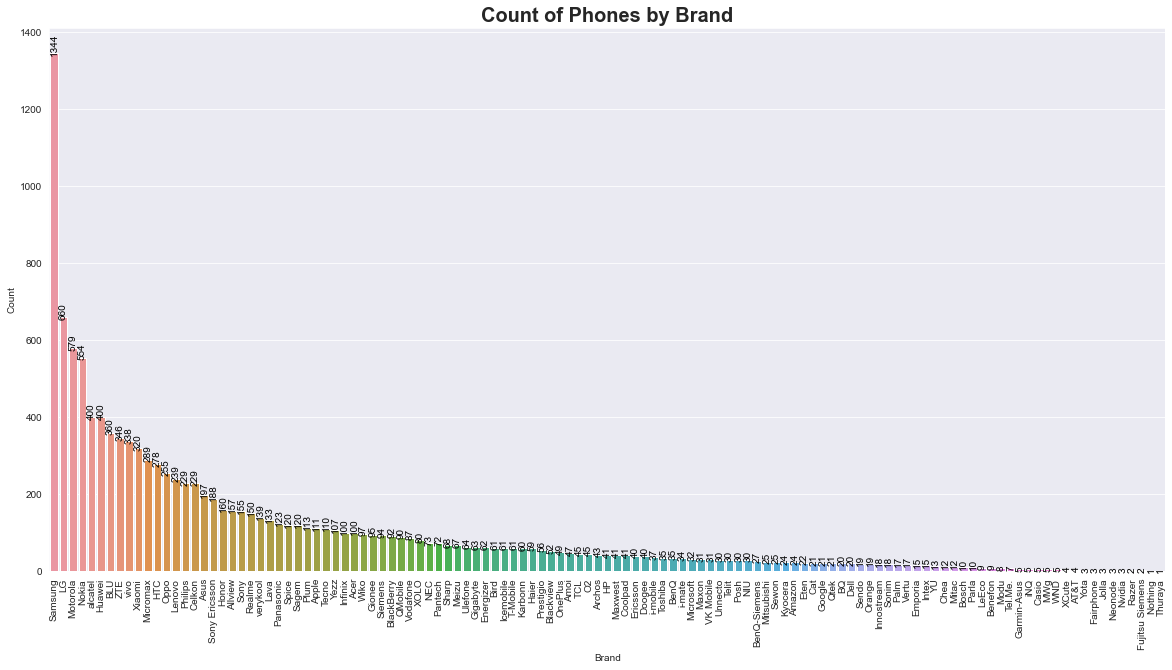

In [6]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values)

# Add actual values on top of each bar
for i, v in enumerate(brand_counts.values):
    plt.text(i, v, str(v), fontsize=10, color='black', ha='center', rotation=90)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Phones by Brand', fontsize=20, weight='bold')

# Show the plot
plt.show()


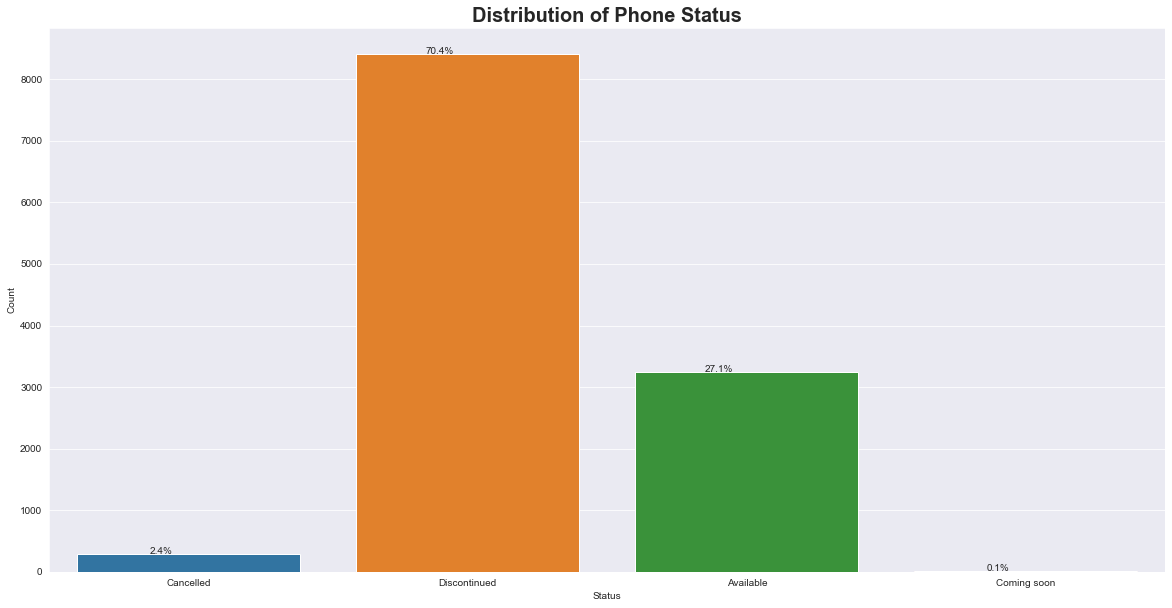

In [7]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Status', data=cleaned_gsm_arena_data)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Phone Status', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Status']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

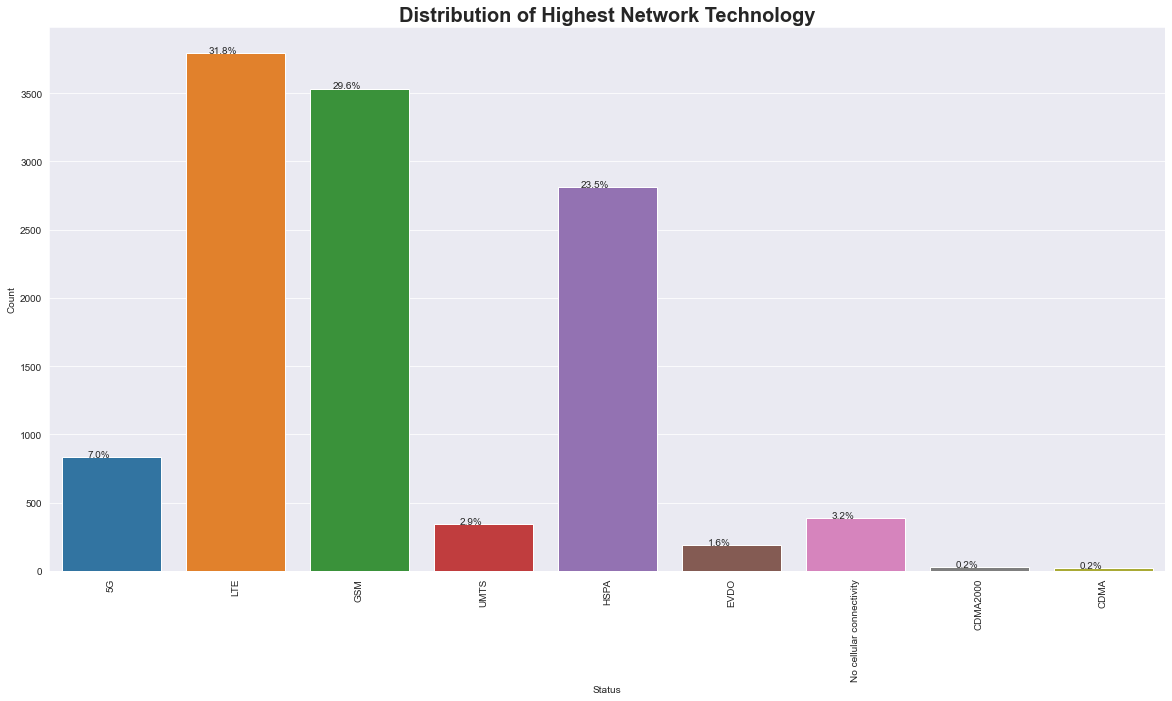

In [8]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Highest_Network_Technology', data=cleaned_gsm_arena_data)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Highest Network Technology', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Highest_Network_Technology']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

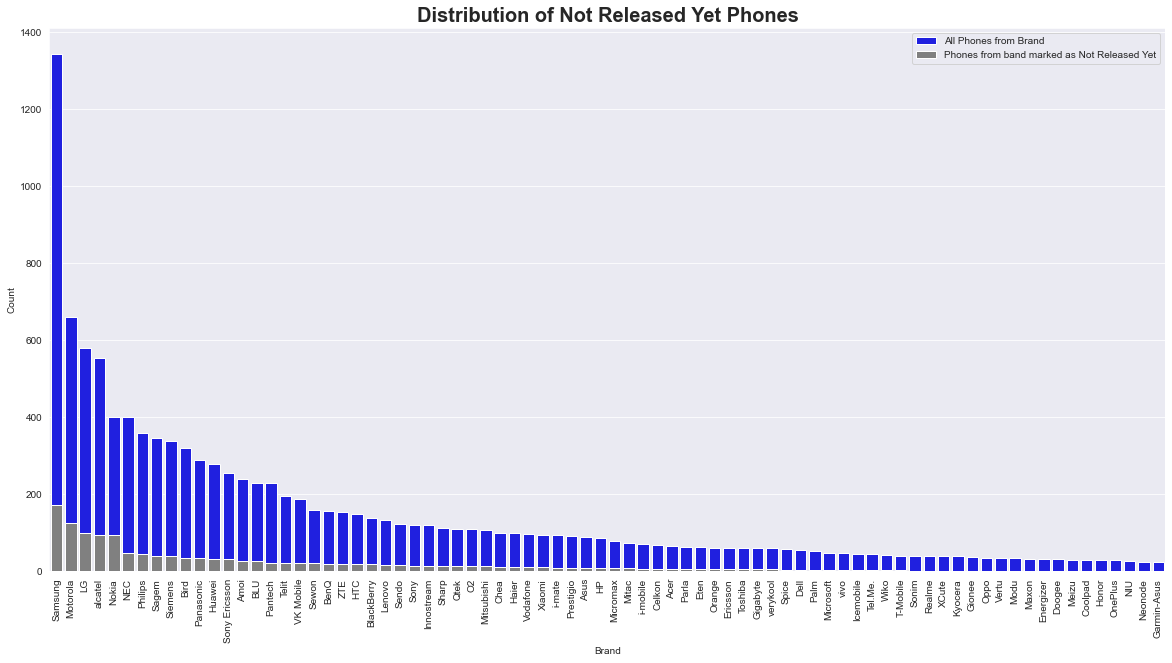

In [9]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()
not_released_counts = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']=='Not Released Yet']['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values, color='blue', label='All Phones from Brand')
sns.barplot(x=not_released_counts.index, y=not_released_counts.values, color='gray', label='Phones from band marked as Not Released Yet')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Not Released Yet Phones', fontsize=20, weight='bold')
plt.legend()

# Show the plot
plt.show()


In [10]:
df = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']!='Not Released Yet']
df['Release_Year'] = df['Released'].apply(lambda x: x.year)
# group data by 'Brand' and year, and count the number of phones released
phone_counts = df.groupby(['Brand', 'Release_Year']).size()
print(phone_counts)

Brand  Release_Year
AT&T   2006             1
       2007             2
       2008             1
Acer   2009            10
       2010             8
                       ..
vivo   2018            31
       2019            47
       2020            49
       2021            76
       2022            83
Length: 907, dtype: int64


In [11]:
import plotly.express as px

# Get the phone counts by brand and release year
phone_counts = df.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create the line plot
fig = px.line(phone_counts, x='Release_Year', y='count', color='Brand')

# Set the x-axis label
fig.update_xaxes(title_text='Release Year')

# Set the y-axis label
fig.update_yaxes(title_text='Count')

# Set the plot title
fig.update_layout(title='Number of Phones Released by Brand each Year between 1994 and 2022')



# Set the maximum value of the x-axis to 2022
fig.update_layout(xaxis=dict(range=[df['Release_Year'].min(), 2022]))

# Remove the legend
fig.update_layout(showlegend=False, height=600, width=1200)

# Show the plot
fig.show()


In [12]:
import ipywidgets as widgets
from ipywidgets import interact

# Get the phone counts by brand and release year
phone_counts = df.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create a list of all the available brands
brands = phone_counts['Brand'].unique().tolist()

# Define a function to update the plot based on the selected brand
def update_plot(brands):
    # Filter the phone counts by the selected brands
    brand_counts = phone_counts[phone_counts['Brand'].isin(brands)]
    
    # Set the size of the figure
    plt.figure(figsize=(20,10))

    # Create the line plot
    sns.set_style('whitegrid')
    g = sns.lineplot(x='Release_Year', y='count', hue='Brand', data=brand_counts)

    # Set the x-axis label and ticks
    g.set(xlabel='Release Year')
    g.set(ylabel='Count')
    g.set(title=f'Number of Phones Released by {", ".join(brands)} each Year')
    g.set_xticks(range(2010, 2023))

    # Show the plot
    plt.show()

# Create the interactive widget
interact(update_plot, brands=widgets.SelectMultiple(options=brands, value=[brands[0]], description='Brand:'));


interactive(children=(SelectMultiple(description='Brand:', index=(0,), options=('AT&T', 'Acer', 'Allview', 'Am…

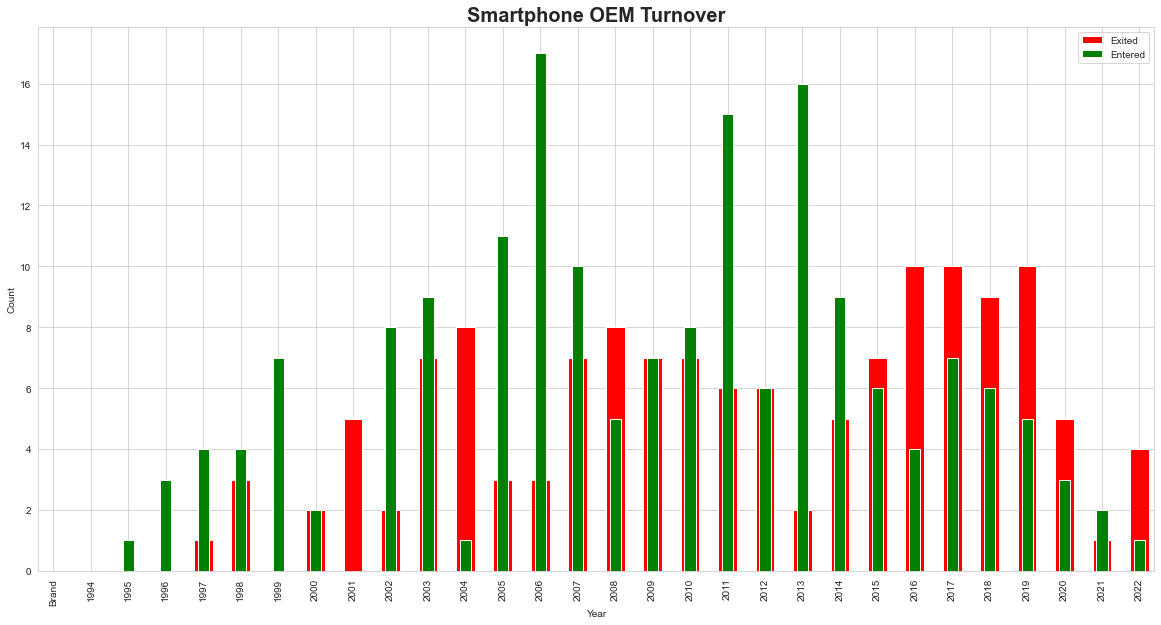

In [13]:
# Create a pivot table to count the number of models released by each OEM in each year
chipset_per_year = pd.pivot_table(df, values='Model', index='Brand', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
chipset_per_year = chipset_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
chipset_per_year = chipset_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = chipset_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(chipset_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(chipset_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(chipset_per_year.iloc[i, j-1])
        curr_value = int(chipset_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited OEMs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Smartphone OEM Turnover", fontsize=20, weight='bold')
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()

***** Build *****

In [14]:
#find the thinnest devices
thinnest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Thickness'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Weight', 'Thickness']]
thinnest_devices = thinnest_devices.sort_values('Thickness').head(10)
print(thinnest_devices)


          Brand                Model Released Weight Thickness
11080    Archos           50b Cobalt  2017-01  160.0       0.0
6943   Micromax  Canvas Play 4G Q469  2015-11  100.0       0.0
11081    Archos           55b Cobalt  2017-01  188.0       0.0
7945     Lenovo       Yoga Tab 3 Pro  2015-12  666.8       4.7
5079       Oppo                   R5  2014-12  155.0       4.9
5092       Oppo                  R5s  2015-08  155.0       4.9
889        Wiko      Highway Pure 4G  2015-04   98.0       5.1
10364       BLU         Vivo Air LTE  2015-09   98.0       5.1
4356    QMobile              Noir Z9  2015-07   97.0       5.1
10341       BLU             Vivo Air  2015-01   97.0       5.1


In [15]:
#find the thickest devices
thickest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Thickness'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Weight', 'Thickness']]
thickest_devices = thickest_devices.sort_values('Thickness', ascending=False).head(10)
print(thickest_devices)

          Brand              Model          Released        Weight Thickness
4022      Sagem            MY 3078           2002-01          85.0      75.0
2755    Samsung               Z110  Not Released Yet         120.0      50.0
4061      Sagem            MY V-76           2005-07         104.0      47.0
4060      Sagem            MY V-56  Not Released Yet          97.0      46.0
4062      Sagem            MY V-85  Not Released Yet         120.0      46.0
10750      Bird               S698  Not Released Yet          73.0      44.0
5419      Nokia  9000 Communicator           1998-01         397.0      38.0
9702   Ericsson             GH 218           1994-01  Not Measured      36.0
2288       Sony         CM-DX 1000           1997-01         235.0      32.0
9725   Ericsson          R250s PRO           2000-01         330.0      32.0


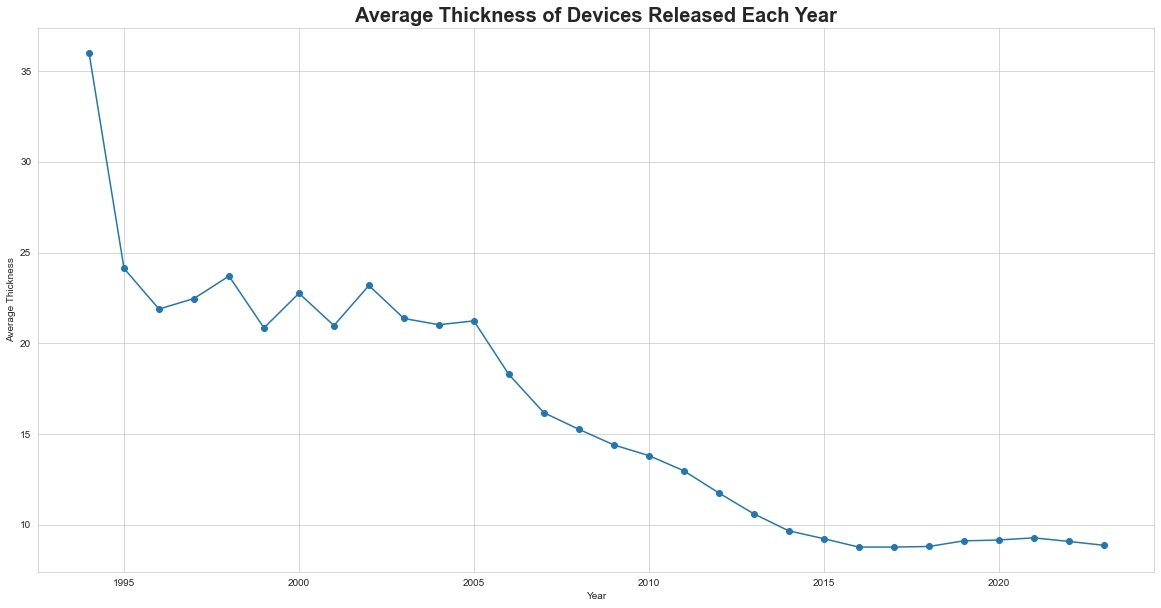

In [16]:
# Filter out devices with measured thickness
measured_screen_to_body_ratio = df[cleaned_gsm_arena_data['Thickness'] != 'Not Measured']

# Convert 'Thickness' column to numeric values
measured_screen_to_body_ratio['Thickness'] = pd.to_numeric(measured_screen_to_body_ratio['Thickness'])

# Group the data by 'Release_Year' and calculate the average thickness for each year
average_thickness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Thickness'].mean()

# Plot the average thickness over the years
plt.figure(figsize=(20, 10))
plt.plot(average_thickness_by_year.index, average_thickness_by_year.values, marker='o')

# Set the plot title and axis labels
plt.title('Average Thickness of Devices Released Each Year', fontsize=20, weight='bold')
plt.xlabel('Year')
plt.ylabel('Average Thickness')

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()


In [17]:
# Find the lightest devices
lightest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Weight'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Thickness', 'Weight']]
lightest_devices = lightest_devices.sort_values('Weight').head(10)
print(lightest_devices)


         Brand                          Model Released     Thickness Weight
8920    Huawei                 Watch Fit mini  2021-09          11.0   20.0
9367     Honor                       Watch ES  2020-09  Not Measured   21.0
8879    Huawei                      Watch Fit  2020-09          10.7   21.0
3841   Samsung            Galaxy Watch Active  2019-04          10.5   25.0
8901    Huawei              Watch Fit Elegant  2021-03          10.7   27.0
6608  Motorola                 Moto Watch 100  2021-12          11.9   29.0
296        ZTE                Red Magic Watch  2021-03          12.4   30.0
297        ZTE                       Watch GT  2021-03          12.4   30.0
3848   Samsung  Galaxy Watch Active2 Aluminum  2019-09          10.9   30.0
821     Xiaomi                     Poco Watch  2022-04          10.0   31.0


In [18]:
# Find the heaviest devices
heaviest_devices = cleaned_gsm_arena_data.loc[cleaned_gsm_arena_data['Weight'] != 'Not Measured', ['Brand', 'Model', 'Released', 'Thickness', 'Weight']]
heaviest_devices = heaviest_devices.sort_values('Weight', ascending=False).head(10)
print(heaviest_devices)

           Brand               Model          Released     Thickness  Weight
11430    Allview           Viva Home           2019-07          19.5  2018.3
9270          HP            Slate 17           2014-09          15.8  2005.0
1709     Toshiba     Excite 13 AT335           2012-07           9.8   998.0
4940   Panasonic      Toughpad FZ-A1  Not Released Yet          17.8   952.5
4939   Panasonic      Toughpad JT-B1           2012-01  Not Measured   952.5
7905      Lenovo   Yoga Tablet 2 Pro           2014-10          12.6   950.0
9268          HP  Pro Slate 10 EE G1           2015-01          14.4   855.0
9269          HP        Pro Slate 12           2015-01           8.0   850.0
8034      Lenovo         Yoga Tab 13           2021-05  Not Measured   830.0
8975         HTC               Shift           2008-02          25.0   800.0


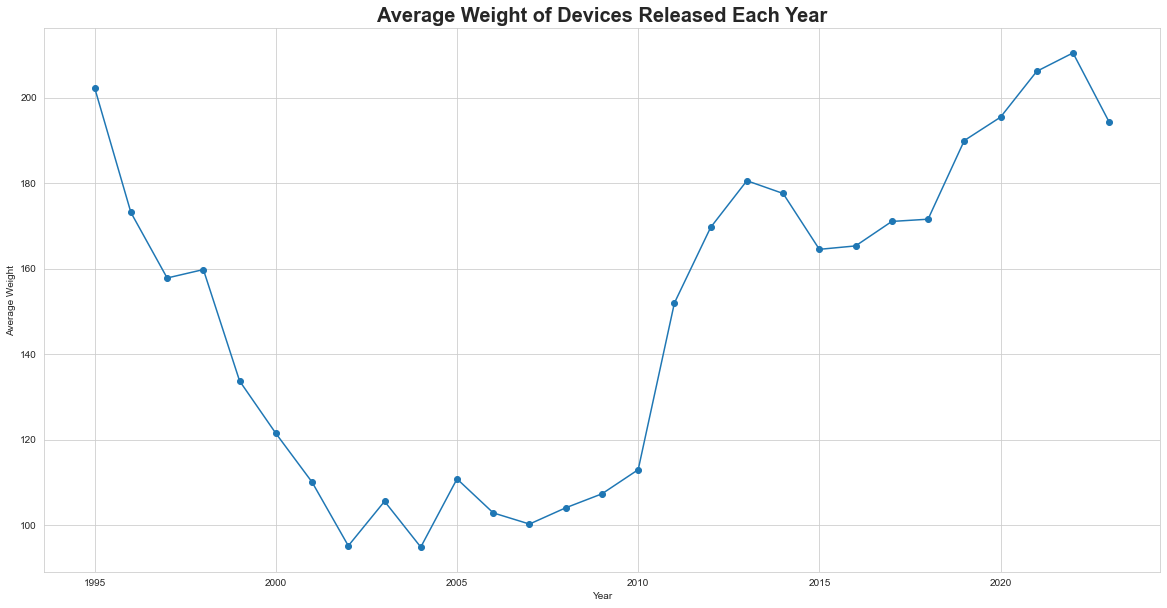

In [19]:
# Filter out devices with measured thickness
measured_screen_to_body_ratio = df[cleaned_gsm_arena_data['Weight'] != 'Not Measured']

# Convert 'Thickness' column to numeric values
measured_screen_to_body_ratio['Weight'] = pd.to_numeric(measured_screen_to_body_ratio['Weight'])

# Group the data by 'Release_Year' and calculate the average thickness for each year
average_thickness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Weight'].mean()

# Plot the average thickness over the years
plt.figure(figsize=(20, 10))
plt.plot(average_thickness_by_year.index, average_thickness_by_year.values, marker='o')

# Set the plot title and axis labels
plt.title('Average Weight of Devices Released Each Year', fontsize=20, weight='bold')
plt.xlabel('Year')
plt.ylabel('Average Weight')

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

***** Display *****

In [20]:
cleaned_gsm_arena_data[['Brand', 'Display_Type',
       'Display_Brightness', 'Display_HDR_Capability', 'Display_Size_(inches)',
       'Screen_To_Body_Ratio_(%)', 'Display_Aspect_Ratio', 'Pixel_Density',
       'Display_Protection']]

,Brand,Display_Type,Display_Brightness,Display_HDR_Capability,Display_Size_(inches),Screen_To_Body_Ratio_(%),Display_Aspect_Ratio,Pixel_Density,Display_Protection
0,ZTE,LCD,Not Specified,No HDR,6.26,Not Measured,19:9,403,Corning Gorilla Glass 3
1,ZTE,LCD,Not Specified,No HDR,6.1,Not Measured,19.5:9,282,no special protection
2,ZTE,CSTN,Not Specified,No HDR,Not Measured,Not Measured,1:1,Not Measured,no special protection
3,ZTE,TFT,Not Specified,No HDR,2.0,26.1,Not Measured,141,no special protection
4,ZTE,TFT,Not Specified,No HDR,2.0,26.1,Not Measured,141,no special protection
...,...,...,...,...,...,...,...,...,...
11931,Acer,LCD,Not Specified,No HDR,10.1,68.4,16:10,224,no special protection
11932,Acer,LCD,Not Specified,No HDR,5.0,65.3,16:9,294,no special protection
11933,Acer,LCD,Not Specified,No HDR,5.5,71.7,16:9,401,no special protection
11934,Acer,LCD,Not Specified,No HDR,7.0,69.8,16:9,210,no special protection


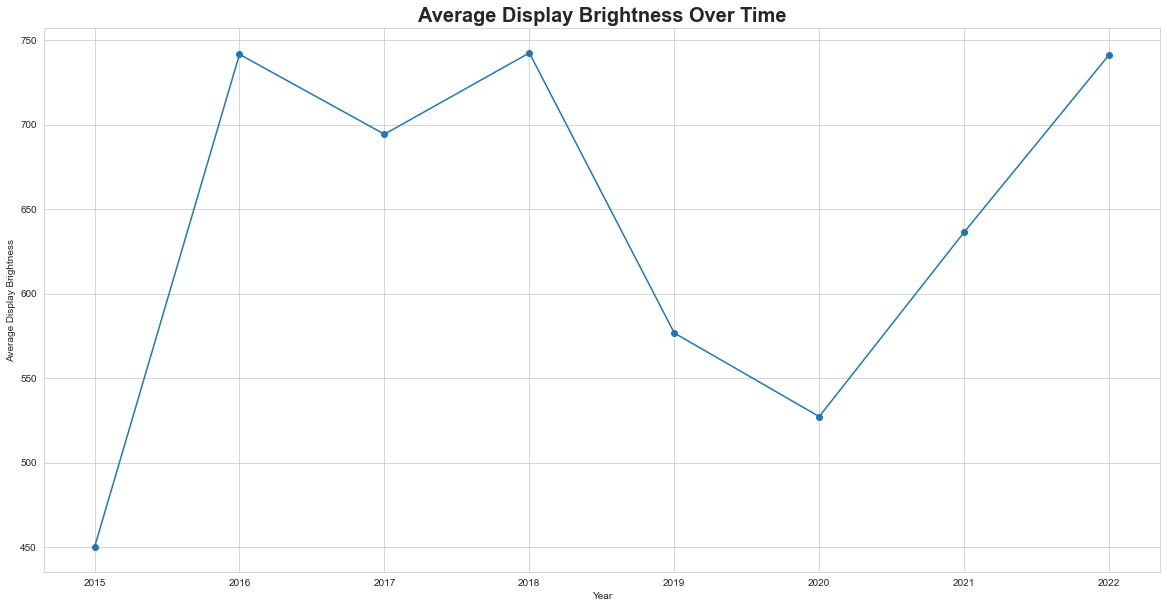

In [21]:
# Exclude rows with "Not Specified" display brightness
measured_screen_to_body_ratio = df[df['Display_Brightness'] != 'Not Specified']

# Convert display brightness to numeric values
measured_screen_to_body_ratio['Display_Brightness'] = pd.to_numeric(measured_screen_to_body_ratio['Display_Brightness'])

# Exclude the year 2023
measured_screen_to_body_ratio = measured_screen_to_body_ratio[measured_screen_to_body_ratio['Release_Year'] <= 2022]

# Group the data by year and calculate the average display brightness
avg_brightness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Display_Brightness'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Display Brightness')
plt.title('Average Display Brightness Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()


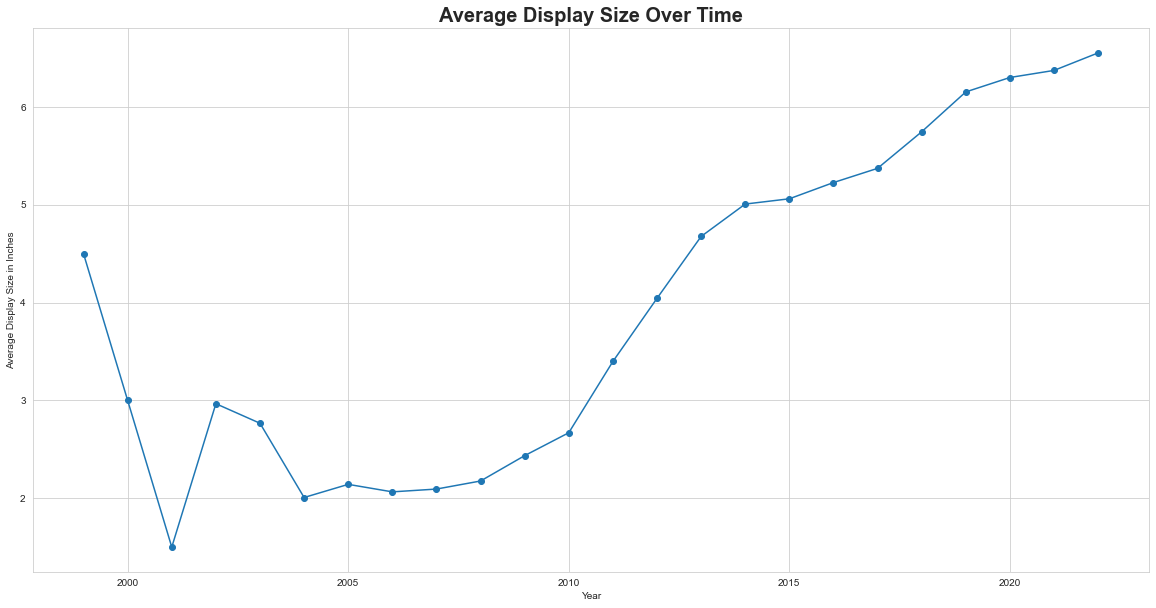

In [22]:
# Exclude rows with "Not Measured" display size
measured_screen_to_body_ratio = df[df['Display_Size_(inches)'] != 'Not Measured']

# Convert display size to numeric values
measured_screen_to_body_ratio['Display_Size_(inches)'] = pd.to_numeric(measured_screen_to_body_ratio['Display_Size_(inches)'])

# Exclude the year 2023
measured_screen_to_body_ratio = measured_screen_to_body_ratio[measured_screen_to_body_ratio['Release_Year'] <= 2022]

# Group the data by year and calculate the average display size
avg_brightness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Display_Size_(inches)'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Display Size in Inches')
plt.title('Average Display Size Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

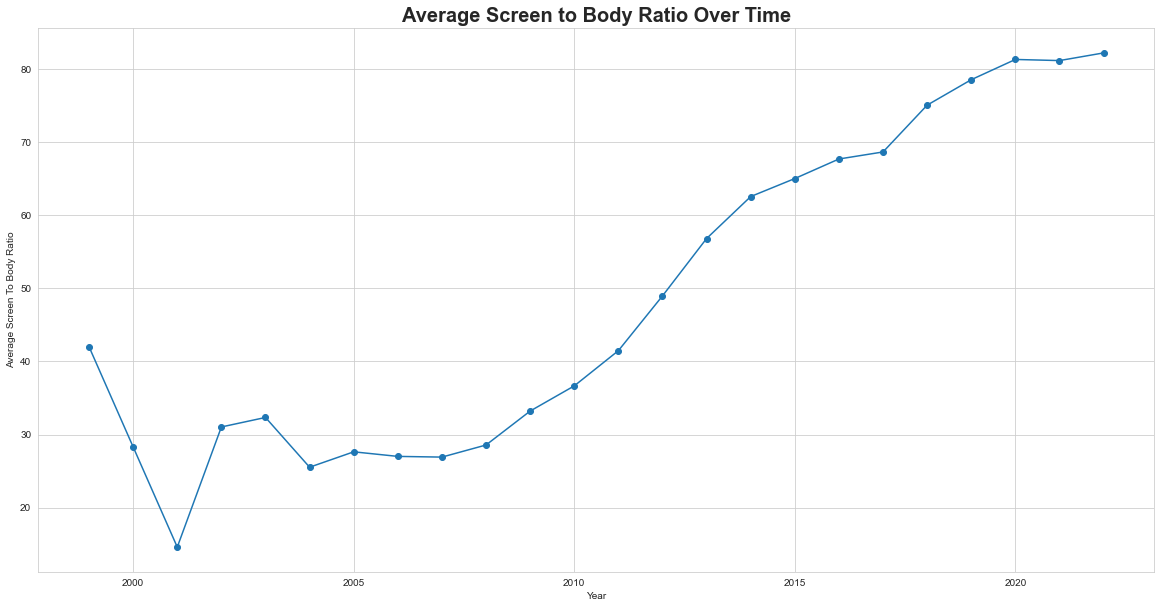

In [23]:
# Exclude rows with "Not Specified" display brightness
measured_screen_to_body_ratio = df[df['Screen_To_Body_Ratio_(%)'] != 'Not Measured']

# Convert display brightness to numeric values
measured_screen_to_body_ratio['Screen_To_Body_Ratio_(%)'] = pd.to_numeric(measured_screen_to_body_ratio['Screen_To_Body_Ratio_(%)'])

# Exclude the year 2023
measured_screen_to_body_ratio = measured_screen_to_body_ratio[measured_screen_to_body_ratio['Release_Year'] <= 2022]

# Group the data by year and calculate the average display brightness
avg_brightness_by_year = measured_screen_to_body_ratio.groupby('Release_Year')['Screen_To_Body_Ratio_(%)'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Screen To Body Ratio')
plt.title('Average Screen to Body Ratio Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

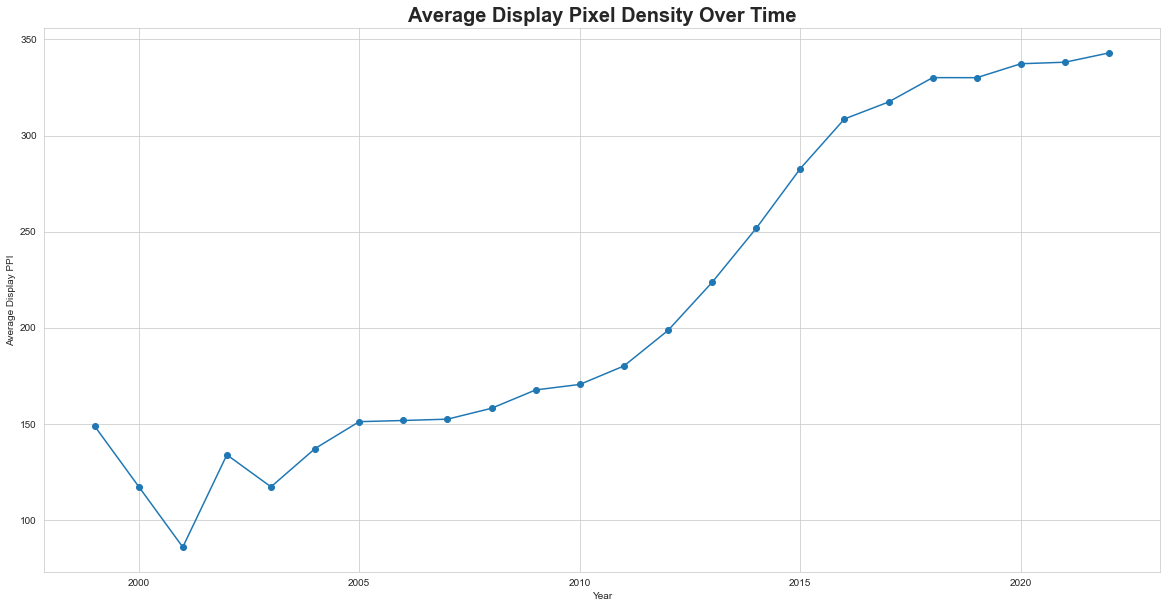

In [24]:
# Exclude rows with "Not Measured" display PPI
measured_pixel_density = df[df['Pixel_Density'] != 'Not Measured']

# Convert display brightness to numeric values
measured_pixel_density['Pixel_Density'] = pd.to_numeric(measured_pixel_density['Pixel_Density'])

# Exclude the year 2023
measured_pixel_density = measured_pixel_density[measured_pixel_density['Release_Year'] <= 2022]

# Group the data by year and calculate the average display brightness
avg_brightness_by_year = measured_pixel_density.groupby('Release_Year')['Pixel_Density'].mean()

# Plotting the line graph
plt.figure(figsize=(20, 10))
plt.plot(avg_brightness_by_year.index, avg_brightness_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Display PPI')
plt.title('Average Display Pixel Density Over Time', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

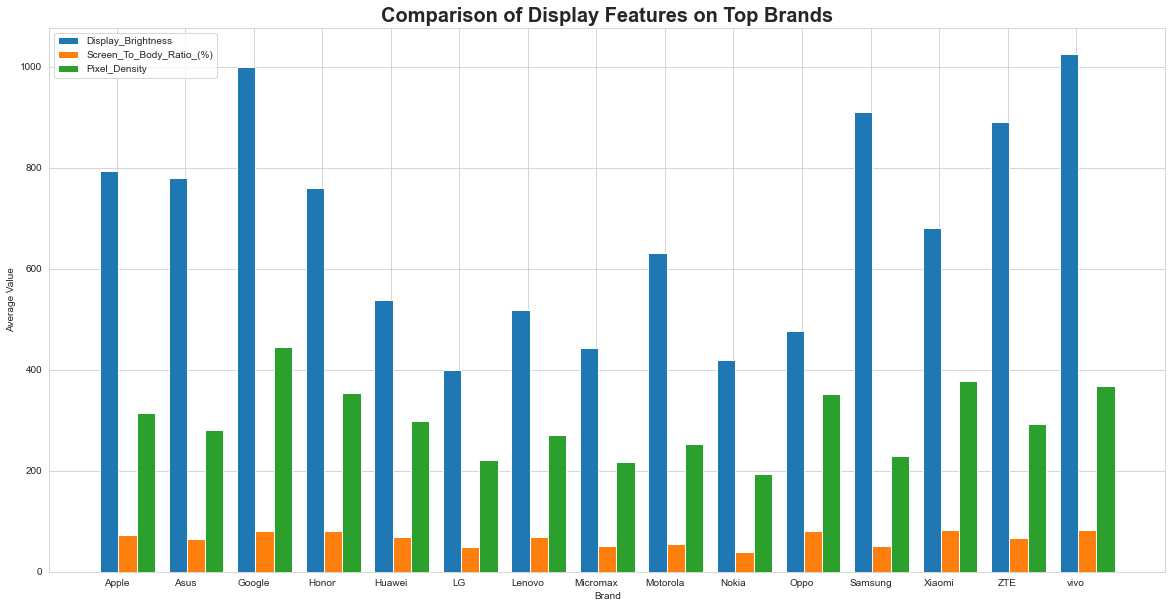

In [25]:
# Count the number of devices for each brand
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()

# Select the top 20 brands with the most number of devices
top_brands = brand_counts.head(20)

# add Apple and Google to the list of top brands
top_brands = top_brands.append(pd.Series({'Apple': 0, 'Google': 0}))

# Filter the data for the top brands
top_brand_data = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Brand'].isin(top_brands.index)]



# Define the columns to compare
columns_to_compare = ['Display_Brightness', 'Screen_To_Body_Ratio_(%)', 'Pixel_Density']

# Filter out non-numeric and "Not Specified" or "Not Measured" values
numeric_data = top_brand_data.replace(['Not Specified', 'Not Measured'], float('NaN'))
numeric_data[columns_to_compare] = numeric_data[columns_to_compare].apply(pd.to_numeric, errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Get the number of columns to compare
num_columns = len(columns_to_compare)

# Set the width of each bar
bar_width = 0.8 / num_columns

# Filter brands that have non-null values for Display_Brightness
valid_brands = numeric_data.dropna(subset=['Display_Brightness'])['Brand'].unique()

# Loop through the columns and plot the bar chart for each
for i, column in enumerate(columns_to_compare):
    # Get the average values for each brand, excluding NaN values
    avg_values = numeric_data[numeric_data['Brand'].isin(valid_brands)].groupby('Brand')[column].mean().dropna()
    
    # Calculate the x positions for the bars
    x_pos = np.arange(len(avg_values)) + (i * bar_width) - (0.4 * bar_width)
    
    # Plot the bars
    plt.bar(x_pos, avg_values, width=bar_width, label=column)
    
# Set the x-axis ticks and labels
plt.xticks(np.arange(len(avg_values)), avg_values.index)
plt.xlabel('Brand')
plt.ylabel('Average Value')
plt.title('Comparison of Display Features on Top Brands', fontsize=20, weight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()


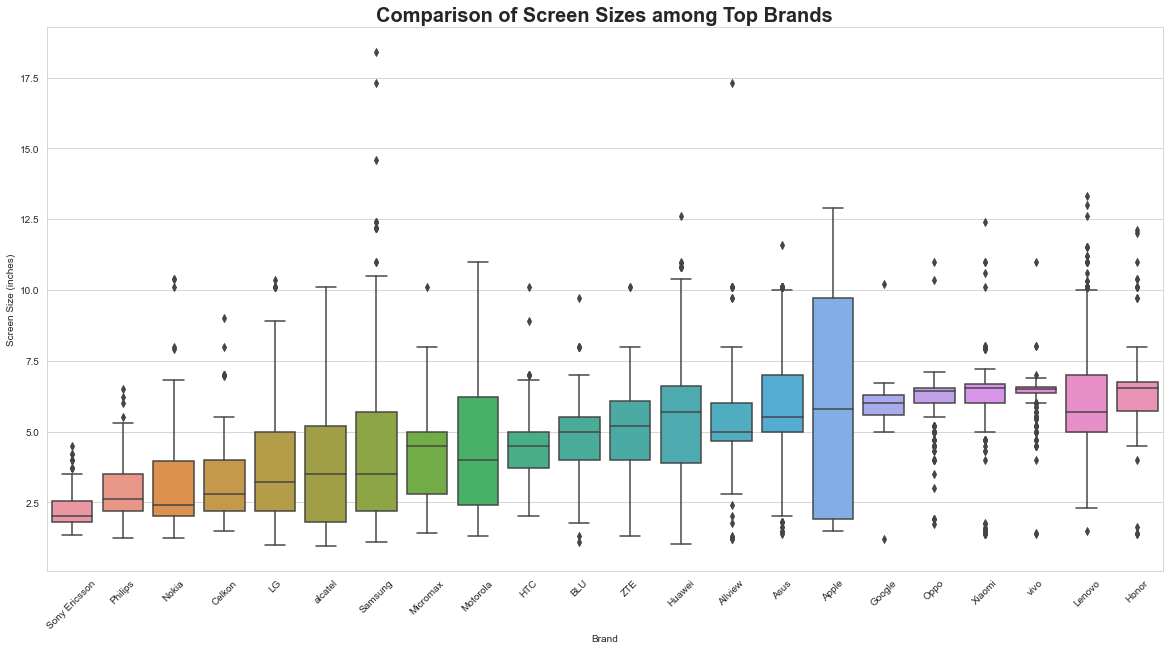

In [26]:
# Filter out non-numeric and "Not Specified" or "Not Measured" values
numeric_data = top_brand_data.replace(['Not Specified', 'Not Measured'], float('NaN'))
numeric_data['Display_Size_(inches)'] = numeric_data['Display_Size_(inches)'].apply(pd.to_numeric, errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Define the order of brands based on their average screen size
brand_order = numeric_data.groupby('Brand')['Display_Size_(inches)'].mean().dropna().sort_values().index

# Create the boxplot
sns.boxplot(x='Brand', y='Display_Size_(inches)', data=numeric_data, order=brand_order)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Brand')
plt.ylabel('Screen Size (inches)')
plt.title('Comparison of Screen Sizes among Top Brands', fontsize=20, weight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [27]:
cleaned_gsm_arena_data['Display_HDR_Capability'].value_counts()

No HDR    11319
HDR10+      334
HDR10       230
HDR          53
Name: Display_HDR_Capability, dtype: int64

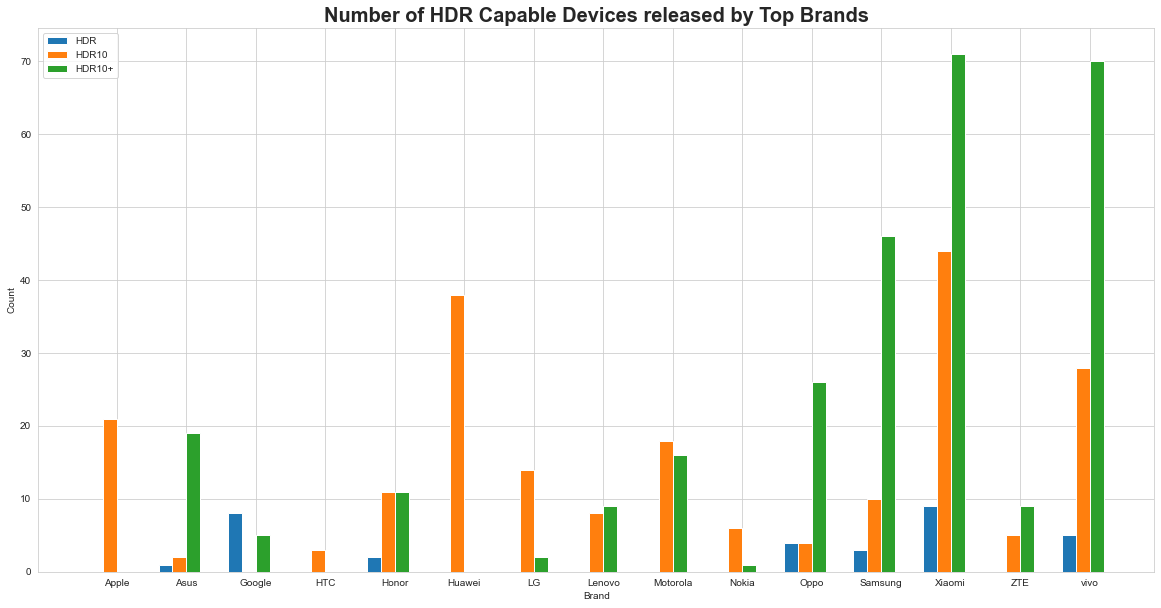

In [28]:
# Exclude "No HDR" values
cam_hdr_data = top_brand_data[top_brand_data['Display_HDR_Capability'] != 'No HDR']

# Get the counts of each HDR type for each brand
cam_hdr_counts = cam_hdr_data.pivot_table(index='Brand', columns='Display_HDR_Capability', aggfunc='size', fill_value=0)

# Get the HDR types
hdr_types = cam_hdr_counts.columns.tolist()

# Set the figure size
plt.figure(figsize=(20, 10))

# Set the width of each bar
bar_width = 0.2

# Calculate the x positions for the bars
x_pos = np.arange(len(cam_hdr_counts.index))

# Loop through the HDR types and plot the bar graphs side by side for each brand
for i, hdr_type in enumerate(hdr_types):
    # Get the counts for the current HDR type
    counts = cam_hdr_counts[hdr_type]
    
    # Calculate the offset for the current HDR type
    offset = (i - 1.5) * bar_width
    
    # Plot the bar graph for the current HDR type
    plt.bar(x_pos + offset, counts.values, width=bar_width, label=hdr_type)

# Set the x-axis ticks and labels
plt.xticks(x_pos, cam_hdr_counts.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of HDR Capable Devices released by Top Brands', fontsize=20, weight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()


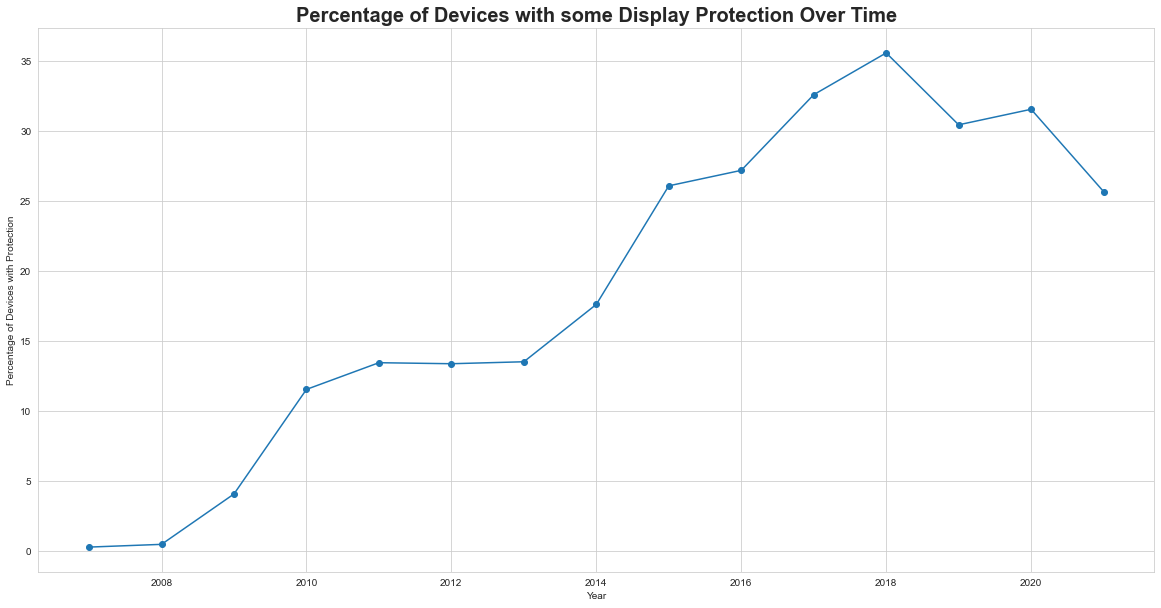

In [29]:
import matplotlib.pyplot as plt

# Exclude devices with "no special protection"
protected_data = df[df['Display_Protection'] != 'no special protection']

# Extract the year from the Release_Year column
protected_data['Year'] = protected_data['Release_Year'].apply(lambda x: int(str(x)[:4]))

# Group by year and calculate the percentage of protected devices
yearly_protection_percentage = protected_data.groupby('Year')['Display_Protection'].count() / df.groupby('Release_Year')['Brand'].count() * 100

# Exclude 2022 data
yearly_protection_percentage = yearly_protection_percentage[yearly_protection_percentage.index < 2022]

# Plot the line graph
plt.figure(figsize=(20, 10))
plt.plot(yearly_protection_percentage.index, yearly_protection_percentage.values, marker='o')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Percentage of Devices with Protection')

# Set the title
plt.title('Percentage of Devices with some Display Protection Over Time', fontsize=20, weight='bold')

# Show the plot
plt.show()


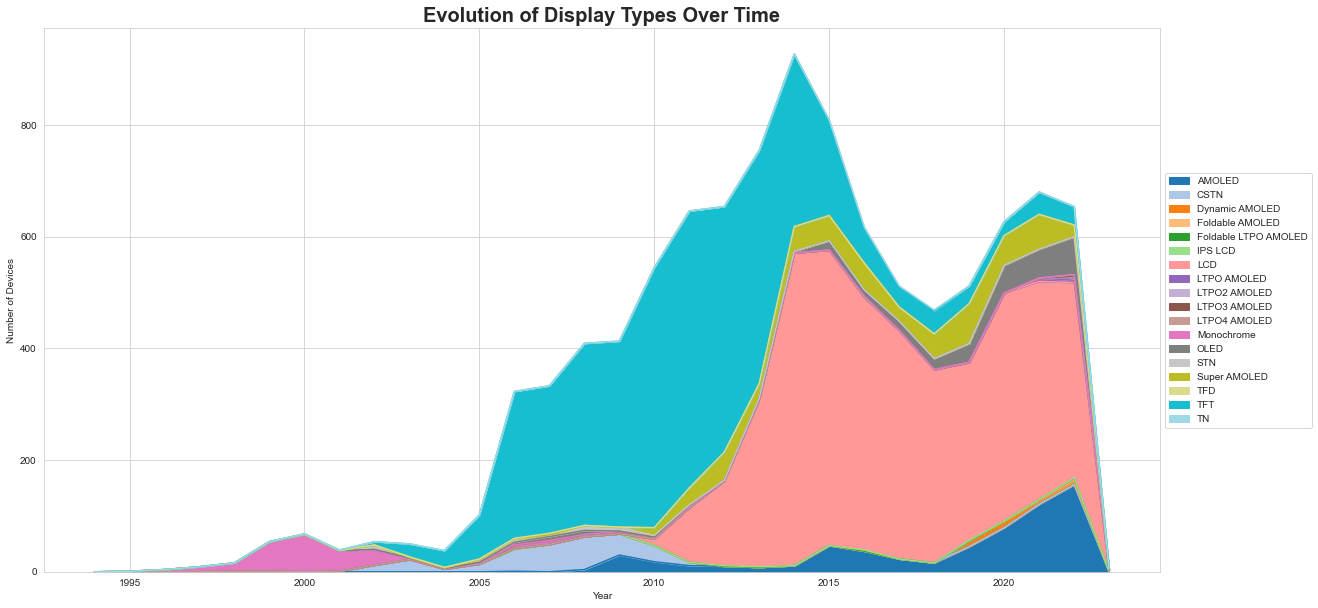

In [30]:
# Group the data by year and display type and calculate the count
os_counts = df.groupby(['Release_Year', 'Display_Type'])['Brand'].count().unstack()

# Exclude the "Not Specified" display type
os_counts = os_counts.drop('Not Specified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
os_counts.plot(kind='area', stacked=True, cmap='tab20', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Display Types Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


***** Cameras *****

In [31]:
cleaned_gsm_arena_data.columns

Index(['Brand', 'Model', 'Highest_Network_Technology', 'Announced', 'Released',
       'Status', 'Length', 'Width', 'Thickness', 'Weight', 'Front', 'Back',
       'Frame', 'Number_of_SIMs', 'Type_of_SIM', 'Display_Type',
       'Display_Brightness', 'Display_HDR_Capability', 'Display_Size_(inches)',
       'Screen_To_Body_Ratio_(%)', 'Display_Aspect_Ratio', 'Pixel_Density',
       'Display_Protection', 'Mobile_OS', 'Mobile_OS_Version', 'Chipset_Maker',
       'Fabrication_Process', 'Number_of_CPU_Cores',
       'CPU_Performance_Core_Frequency', 'CPU_Efficiency_Core_Frequency',
       'SD Card Slot', 'ROM', 'RAM', 'Number_of_Rear_Cameras',
       'Storage_Type_Version', 'Storage_Type', 'Highest_Camera_Resolution',
       'HDR', 'Rear_Video_Resolution', 'Rear_Video_Framerate',
       'Number_of_Selfie_Cameras', 'Selfie_Video_Resolution',
       'Selfie_Video_Framerate', 'Headphone_Jack', 'WI-FI', 'Bluetooth', 'NFC',
       'Radio', 'USB_Connector', 'USB_Version', 'Biometric_Sensor',
    

In [32]:
df['Number_of_Rear_Cameras'].value_counts()

1.0    7267
0.0    1008
3.0     975
2.0     805
4.0     434
5.0       8
Name: Number_of_Rear_Cameras, dtype: int64

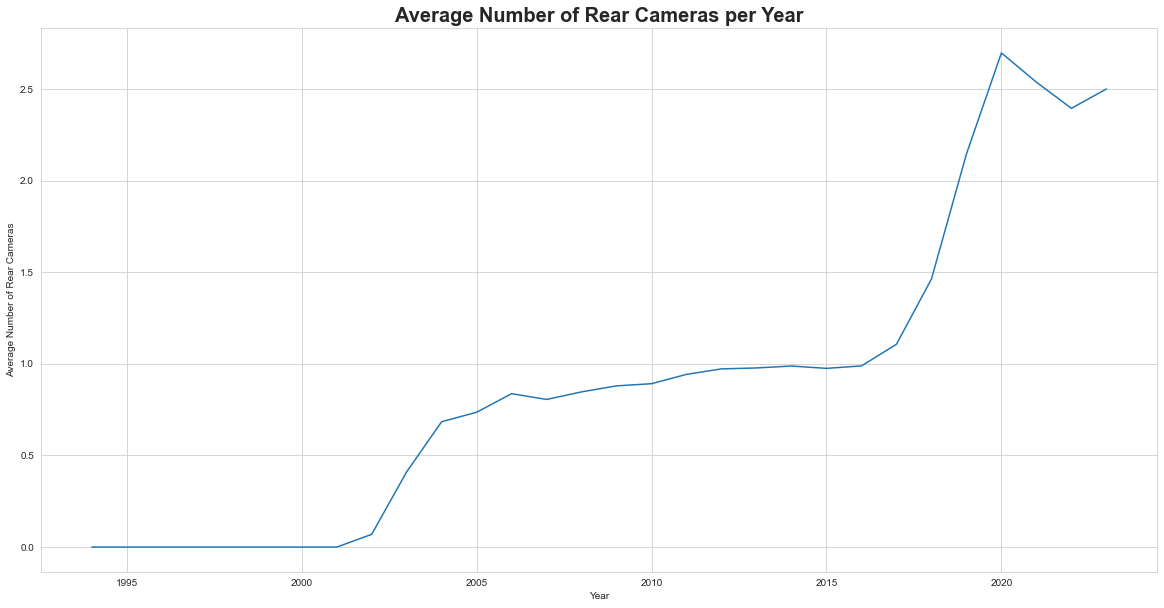

In [33]:
# Group the data by year and calculate the average number of rear cameras
average_cameras_per_year = df.groupby('Release_Year')['Number_of_Rear_Cameras'].mean()

# Create a line plot
plt.figure(figsize=(20, 10))
plt.plot(average_cameras_per_year.index, average_cameras_per_year.values)

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Average Number of Rear Cameras')

# Set the title
plt.title('Average Number of Rear Cameras per Year', fontsize=20, weight='bold')

# Show the plot
plt.show()


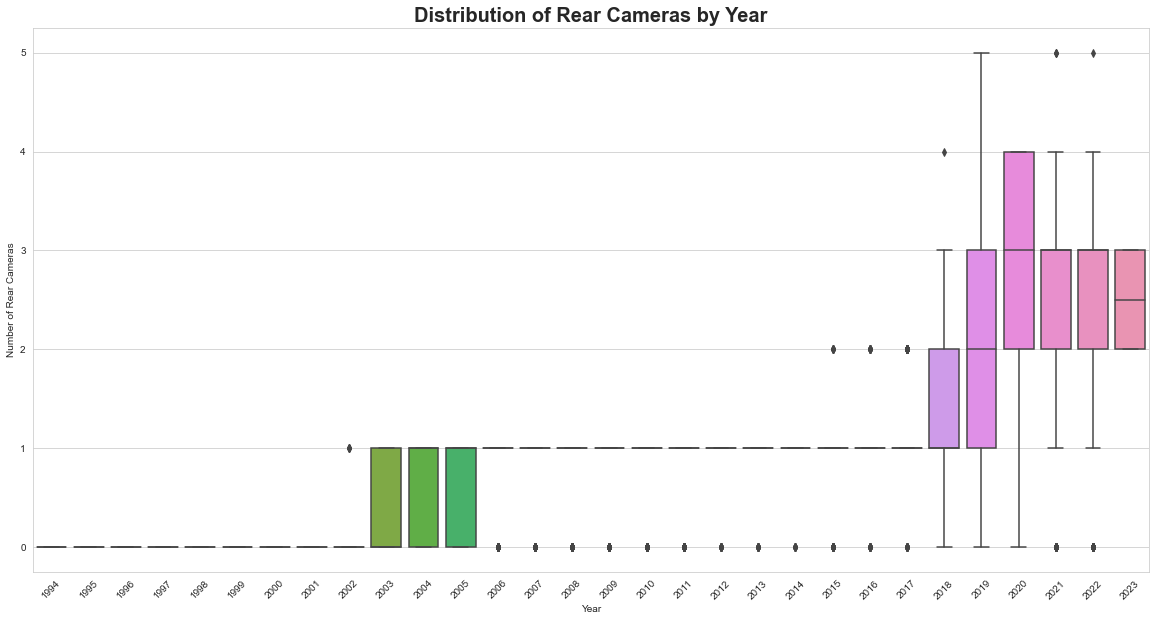

In [34]:
# Create a boxplot for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Release_Year', y='Number_of_Rear_Cameras')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Number of Rear Cameras')

# Set the title
plt.title('Distribution of Rear Cameras by Year', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


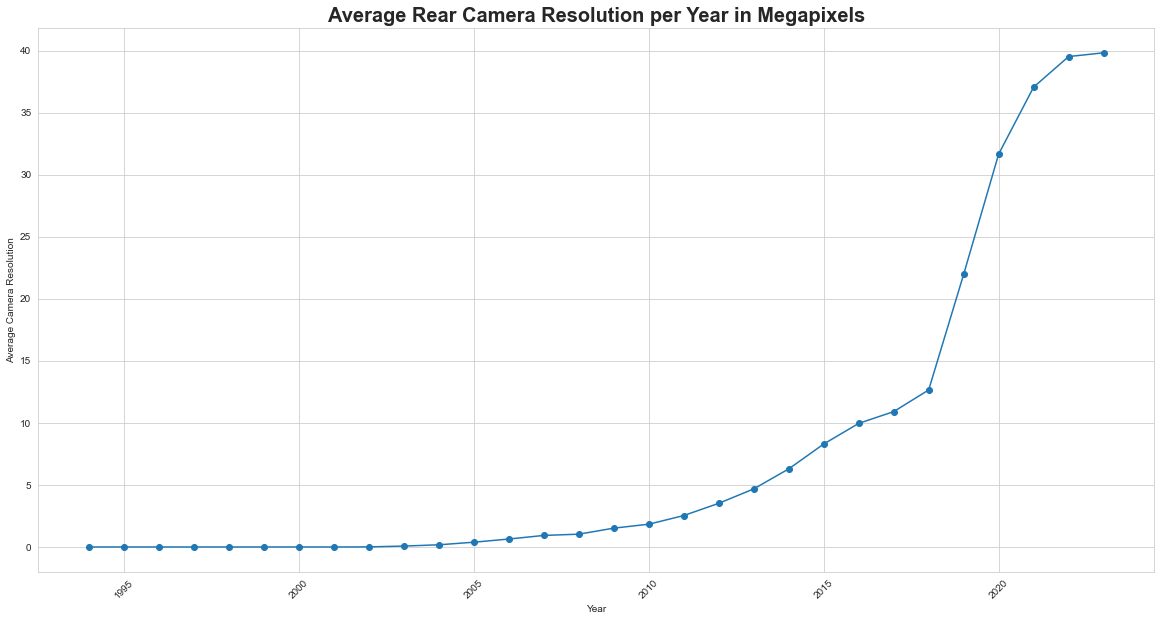

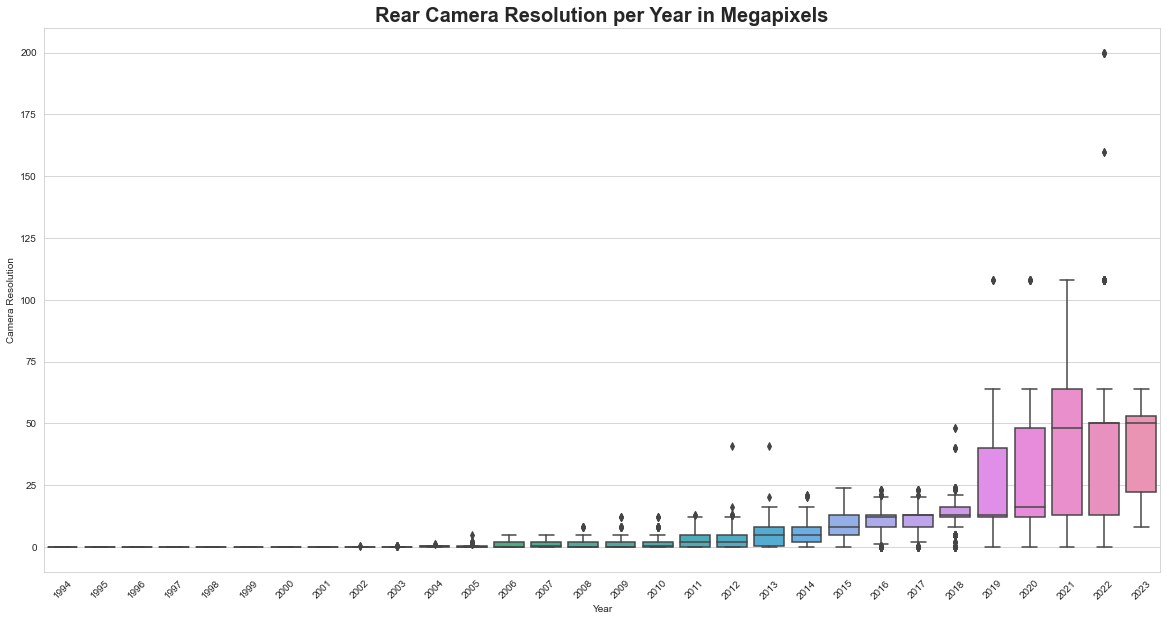

In [35]:
import seaborn as sns

# Convert "VGA" to 0.3 and "no camera" to 0
df['Highest_Camera_Resolution'] = df['Highest_Camera_Resolution'].replace({'VGA': 0.3, 'no camera': 0})

# Convert the column to numeric type
df['Highest_Camera_Resolution'] = pd.to_numeric(df['Highest_Camera_Resolution'])

# Calculate the average camera resolution per year
average_resolution_per_year = df.groupby('Release_Year')['Highest_Camera_Resolution'].mean()

# Create a line plot of average camera resolution per year
plt.figure(figsize=(20, 10))
plt.plot(average_resolution_per_year.index, average_resolution_per_year.values, marker='o')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Average Camera Resolution')

# Set the title
plt.title('Average Rear Camera Resolution per Year in Megapixels', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Create boxplots of camera resolutions per year
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Release_Year', y='Highest_Camera_Resolution')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Camera Resolution')

# Set the title
plt.title('Rear Camera Resolution per Year in Megapixels', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


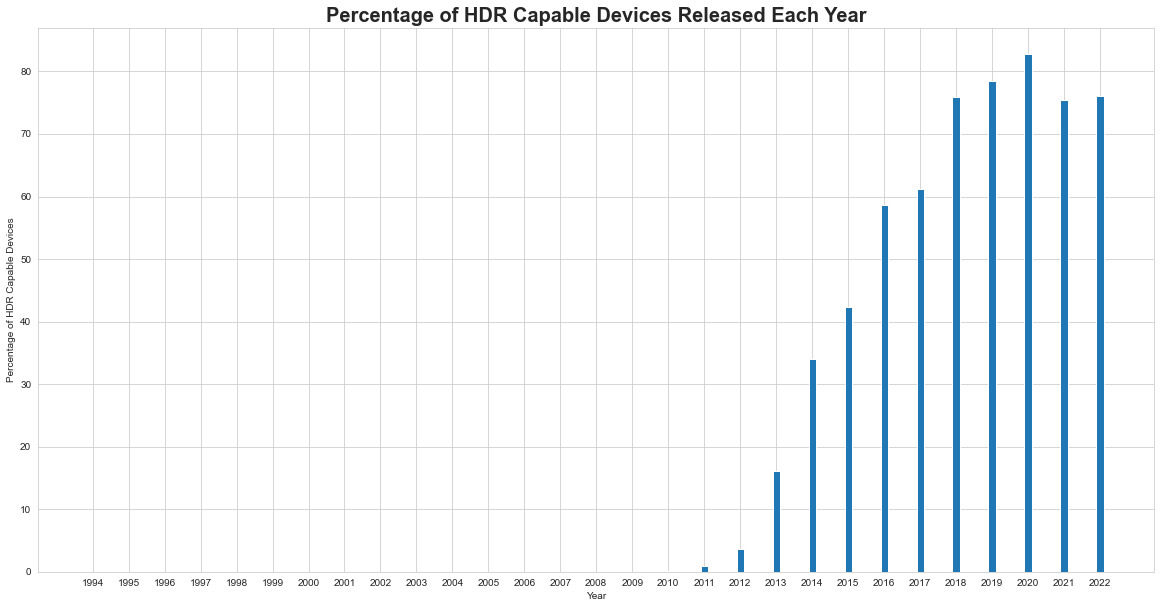

In [36]:
# filter out data after 2022
cam_hdr_data = df[df['Release_Year'] <= 2022]

# Group the data by year and calculate the percentage of HDR capable devices
cam_hdr_percentage = cam_hdr_data.groupby('Release_Year')['HDR'].apply(lambda x: (x != 'no HDR').sum() / len(x) * 100)

# Set the figure size
plt.figure(figsize=(20, 10))

# Set the width of each bar
bar_width = 0.2

# Calculate the x positions for the bars
x_pos = np.arange(len(cam_hdr_percentage.index))

# Plot the bar graph for HDR percentages
plt.bar(x_pos, cam_hdr_percentage.values, width=bar_width)

# Set the x-axis ticks and labels
plt.xticks(x_pos, cam_hdr_percentage.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Percentage of HDR Capable Devices')
plt.title('Percentage of HDR Capable Devices Released Each Year', fontsize=20, weight='bold')

# Show the plot
plt.show()


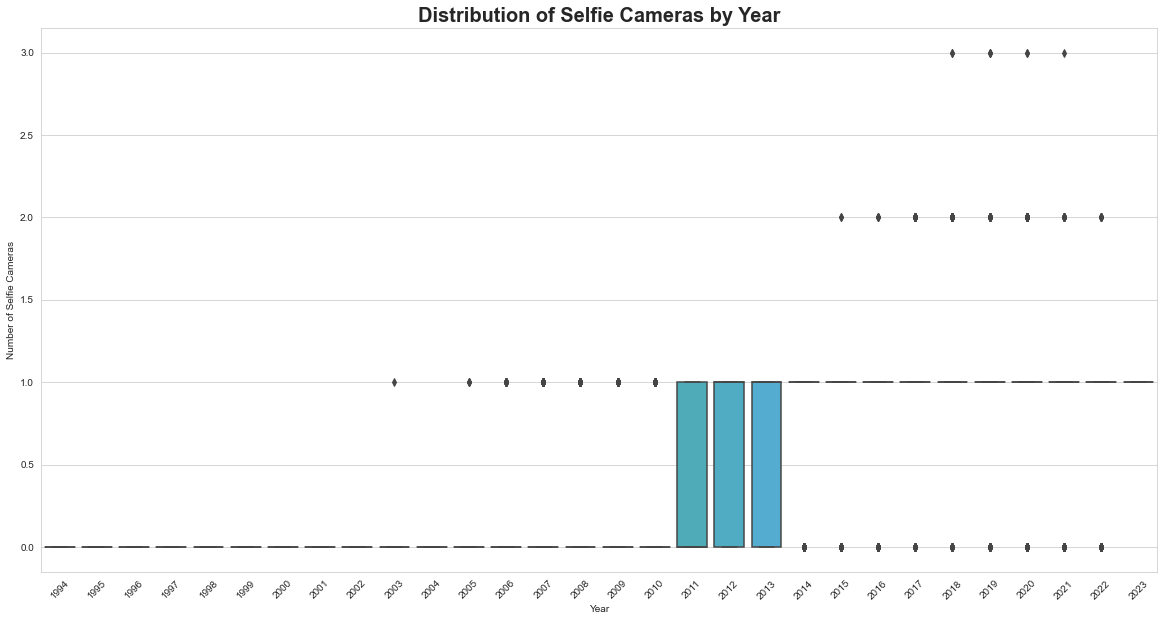

In [37]:
# Create a boxplot for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Release_Year', y='Number_of_Selfie_Cameras')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Number of Selfie Cameras')

# Set the title
plt.title('Distribution of Selfie Cameras by Year', fontsize=20, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


***** OS + Chipset *****

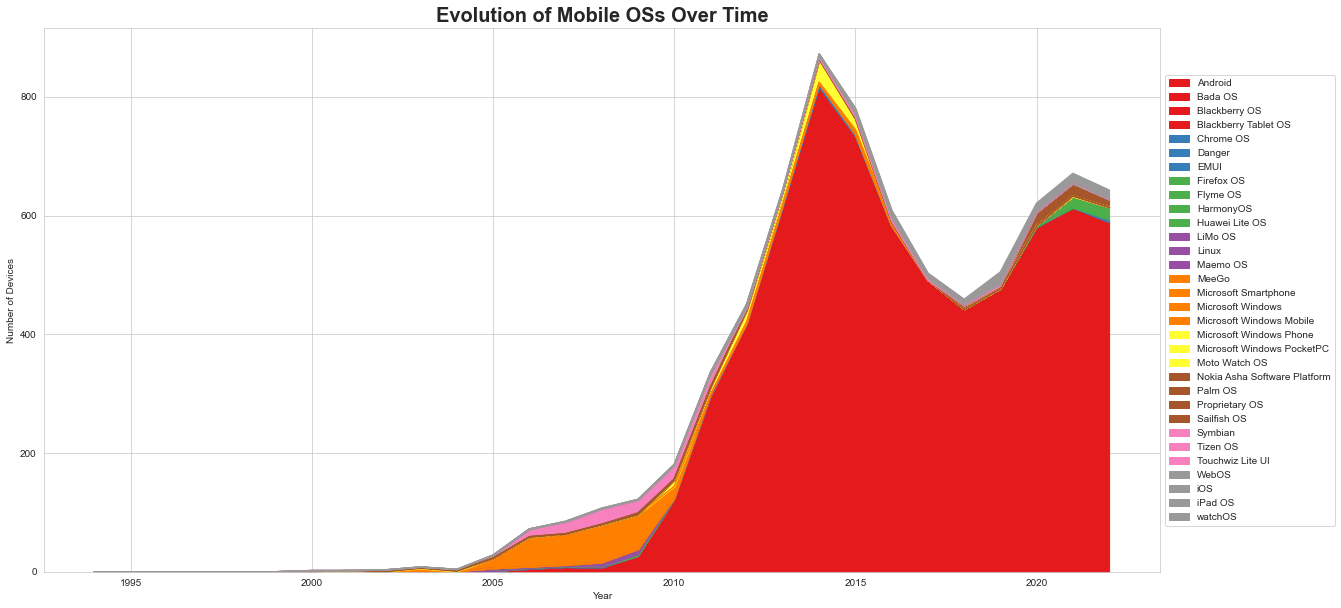

In [38]:
# Group the data by year and display type and calculate the count
os_data = df[df['Release_Year'] <= 2022]
os_counts = os_data.groupby(['Release_Year', 'Mobile_OS'])['Mobile_OS'].count().unstack()

# Exclude the "Not Specified" display type
os_counts = os_counts.drop('unspecified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
os_counts.plot(kind='area', stacked=True, cmap='Set1', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Mobile OSs Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


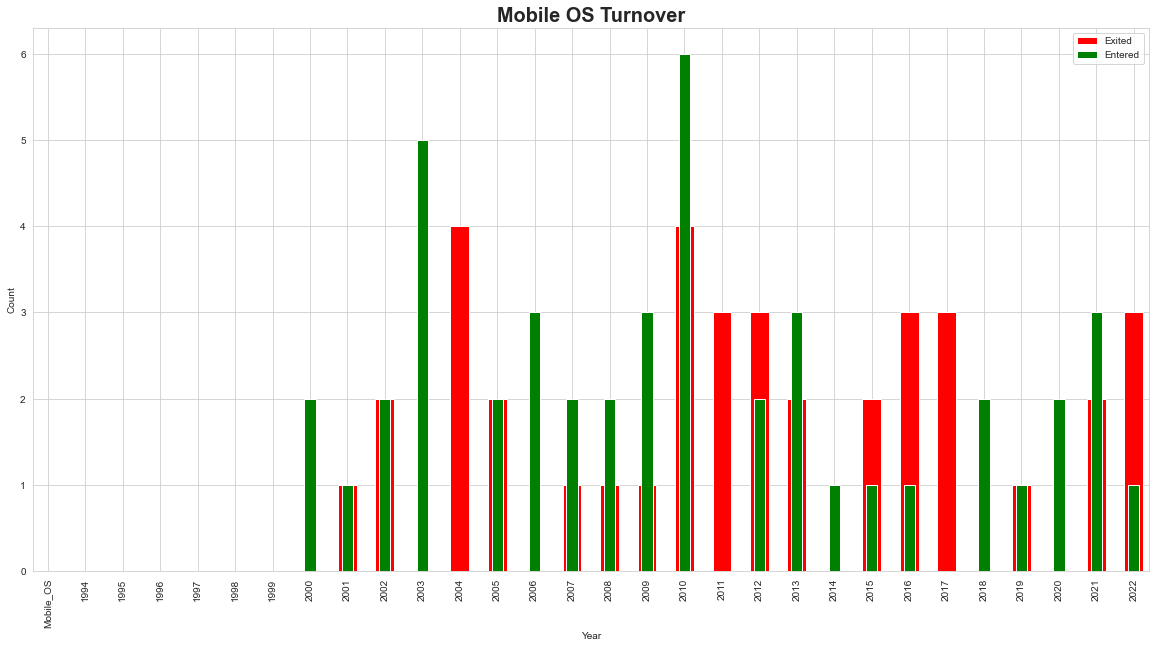

In [39]:
# Create a pivot table to count the number of models released for each Mobile OS in each year
chipset_per_year = pd.pivot_table(df, values='Model', index='Mobile_OS', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
chipset_per_year = chipset_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
chipset_per_year = chipset_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = chipset_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(chipset_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(chipset_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(chipset_per_year.iloc[i, j-1])
        curr_value = int(chipset_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited Mobile OSs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Mobile OS Turnover", fontsize=20, weight='bold')
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [40]:
cleaned_gsm_arena_data['Mobile_OS_Version'].value_counts()

unspecified                                                                    3766
Android 4.4.2 (KitKat)                                                          430
Android 6.0 (Marshmallow)                                                       272
Android 5.1 (Lollipop)                                                          258
Android 4.2 (Jelly Bean)                                                        252
                                                                               ... 
Android 10, MIUI 12.5                                                             1
Android 9.0 (Pie), Android One                                                    1
Android 10 (Go edition), upgradable to Android 11 (Go edition), Android One       1
Android 10, upgradable to Android 11, Android One                                 1
Chrome OS                                                                         1
Name: Mobile_OS_Version, Length: 1525, dtype: int64

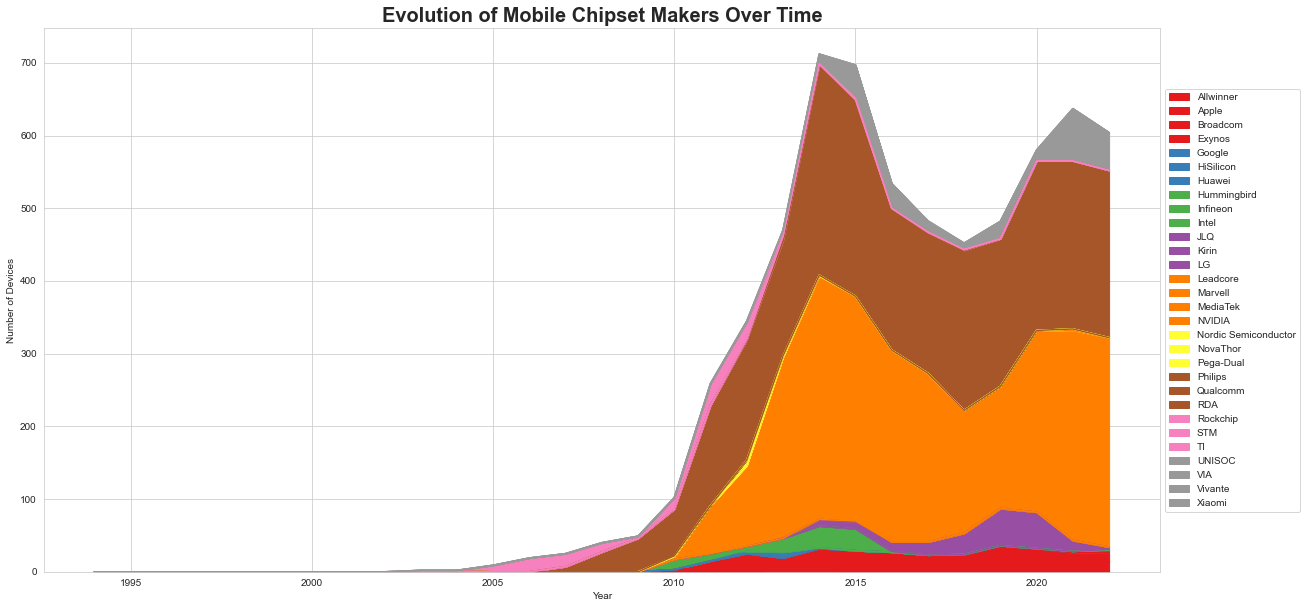

In [41]:
# Group the data by year and display type and calculate the count
chipset_data = df[df['Release_Year'] <= 2022]
chipset_counts = chipset_data.groupby(['Release_Year', 'Chipset_Maker'])['Chipset_Maker'].count().unstack()

# Exclude the "Not Specified" display type
chipset_counts = chipset_counts.drop('unspecified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
chipset_counts.plot(kind='area', stacked=True, cmap='Set1', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Mobile Chipset Makers Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

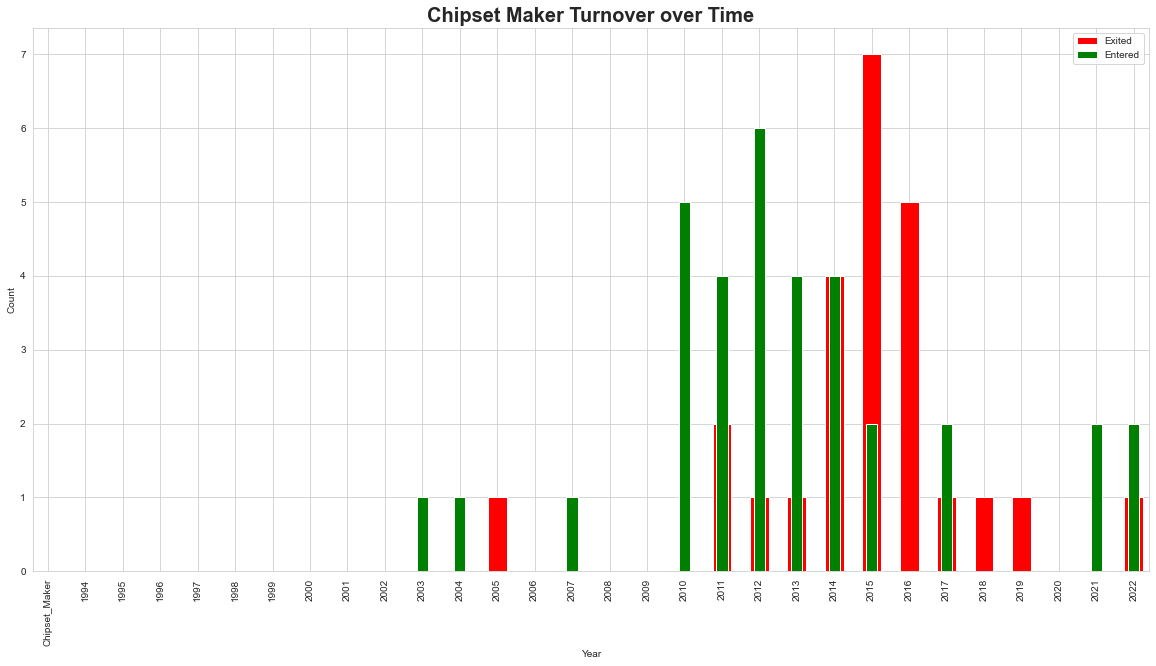

In [42]:
# Create a pivot table to count the number of models released for each Mobile OS in each year
chipset_per_year = pd.pivot_table(df, values='Model', index='Chipset_Maker', columns='Release_Year', aggfunc='count', fill_value=0)

# Reindex the pivot table to include all years from 1995 to 2022
all_years = pd.Index(range(1994, 2023), name='Year')
chipset_per_year = chipset_per_year.reindex(columns=all_years, fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
chipset_per_year = chipset_per_year.reset_index()

# Create a new dataframe to record the changes
changes_df = chipset_per_year.copy()

# Iterate over each row starting from the second row
for i in range(0, len(chipset_per_year)):
    # Iterate over each year column starting from the second column
    for j in range(2, len(chipset_per_year.columns)):
        if j == 0:
            continue

        prev_value = int(chipset_per_year.iloc[i, j-1])
        curr_value = int(chipset_per_year.iloc[i, j])

        # Check the conditions and label the changes accordingly
        if prev_value == 0 and curr_value > 0:
            changes_df.iloc[i, j] = "entered"
        elif prev_value == 0 and curr_value == 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value > 0:
            changes_df.iloc[i, j] = "no change"
        elif prev_value > 0 and curr_value == 0:
            changes_df.iloc[i, j] = "exited"

# Compute the counts of entered and exited Mobile OSs
entered_counts = changes_df[changes_df == "entered"].count()
exited_counts = changes_df[changes_df == "exited"].count()

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 10))
exited_counts.plot(kind="bar", color="red", label="Exited", ax=ax)
entered_counts.plot(kind="bar", color="green", label="Entered", ax=ax, width=0.3)

# Set the plot title and axis labels
plt.title("Chipset Maker Turnover over Time", fontsize=20, weight='bold')
plt.xlabel("Year")
plt.ylabel("Count")

# Add a legend
plt.legend()

# Display the plot
plt.show()


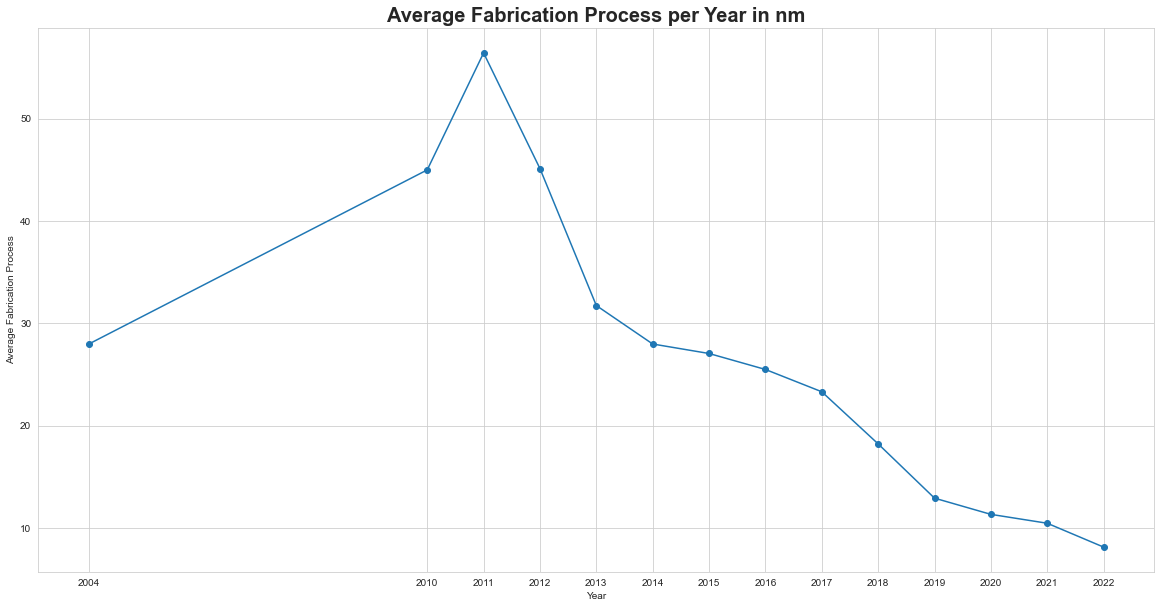

In [43]:
# Filter the DataFrame to exclude 0 values and data for the year 2023
filtered_df5 = df[(df['Fabrication_Process'] != 0) & (df['Release_Year'] <= 2022)]

# Calculate the average Fabrication Process per year
avg_battery_capacity = filtered_df5.groupby('Release_Year')['Fabrication_Process'].mean()

# Create the line plot
plt.figure(figsize=(20, 10))
plt.plot(avg_battery_capacity.index, avg_battery_capacity.values, marker='o')

# Set the x-axis ticks and labels
plt.xticks(avg_battery_capacity.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Fabrication Process')
plt.title('Average Fabrication Process per Year in nm', fontsize=20, weight='bold')

# Show the plot
plt.show()


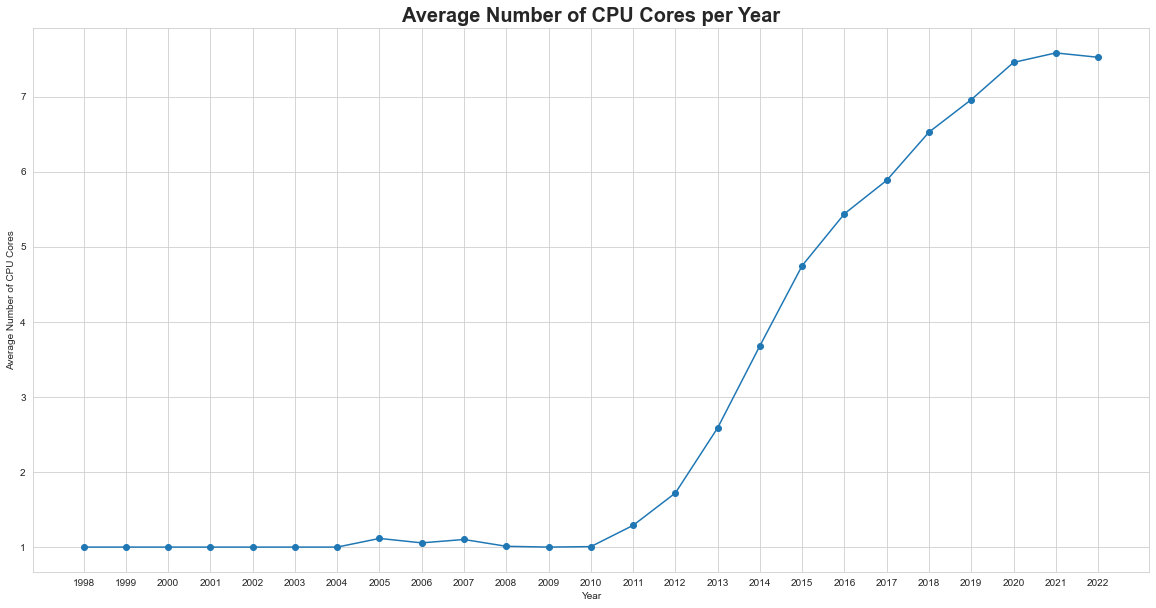

In [44]:
# Filter the DataFrame to exclude 0 values and data for the year 2023
filtered_df5 = df[(df['Number_of_CPU_Cores'] != 'Unspecified') & (df['Release_Year'] <= 2022)]

# Calculate the average Fabrication Process per year
avg_battery_capacity = filtered_df5.groupby('Release_Year')['Number_of_CPU_Cores'].mean()

# Create the line plot
plt.figure(figsize=(20, 10))
plt.plot(avg_battery_capacity.index, avg_battery_capacity.values, marker='o')

# Set the x-axis ticks and labels
plt.xticks(avg_battery_capacity.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Number of CPU Cores')
plt.title('Average Number of CPU Cores per Year', fontsize=20, weight='bold')

# Show the plot
plt.show()

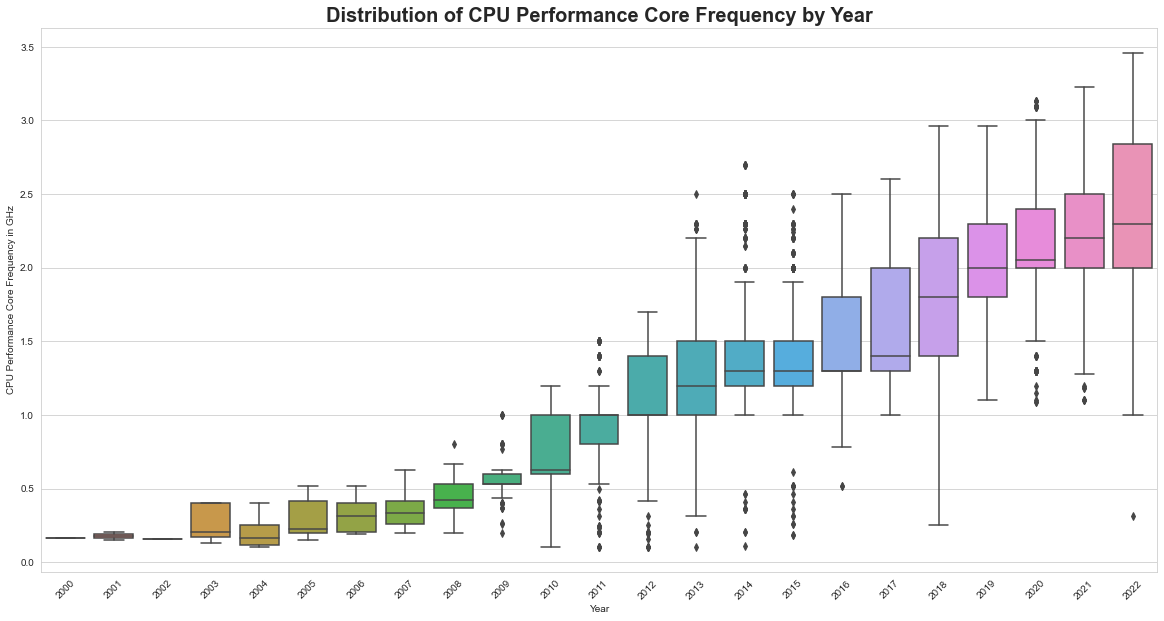

In [45]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[(df['CPU_Performance_Core_Frequency'] != 'unspecified') & 
                  (df['Release_Year'] <= 2022) & 
                  (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['CPU_Performance_Core_Frequency'] = pd.to_numeric(filtered_df['CPU_Performance_Core_Frequency'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='CPU_Performance_Core_Frequency')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('CPU Performance Core Frequency in GHz')
plt.title('Distribution of CPU Performance Core Frequency by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


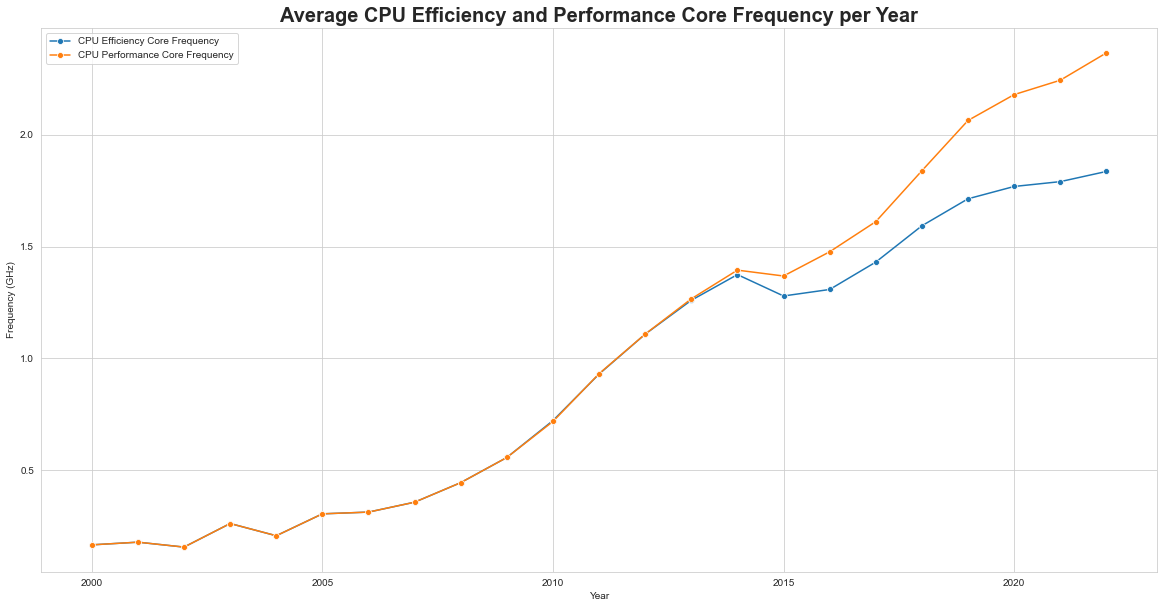

In [46]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[(df['CPU_Efficiency_Core_Frequency'] != 'unspecified') & 
                  (df['CPU_Performance_Core_Frequency'] != 'unspecified') & 
                  (df['Release_Year'] <= 2022) & 
                  (pd.to_numeric(df['CPU_Efficiency_Core_Frequency'], errors='coerce') <= 10) & 
                  (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Efficiency_Core_Frequency and CPU_Performance_Core_Frequency columns to numeric
filtered_df['CPU_Efficiency_Core_Frequency'] = pd.to_numeric(filtered_df['CPU_Efficiency_Core_Frequency'], errors='coerce')
filtered_df['CPU_Performance_Core_Frequency'] = pd.to_numeric(filtered_df['CPU_Performance_Core_Frequency'], errors='coerce')

# Calculate the average values per year
average_efficiency_freq = filtered_df.groupby('Release_Year')['CPU_Efficiency_Core_Frequency'].mean()
average_performance_freq = filtered_df.groupby('Release_Year')['CPU_Performance_Core_Frequency'].mean()

# Plot the average CPU efficiency core frequency
plt.figure(figsize=(20, 10))
sns.lineplot(data=average_efficiency_freq, marker='o', label='CPU Efficiency Core Frequency')

# Plot the average CPU performance core frequency
sns.lineplot(data=average_performance_freq, marker='o', label='CPU Performance Core Frequency')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Frequency (GHz)')
plt.title('Average CPU Efficiency and Performance Core Frequency per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()


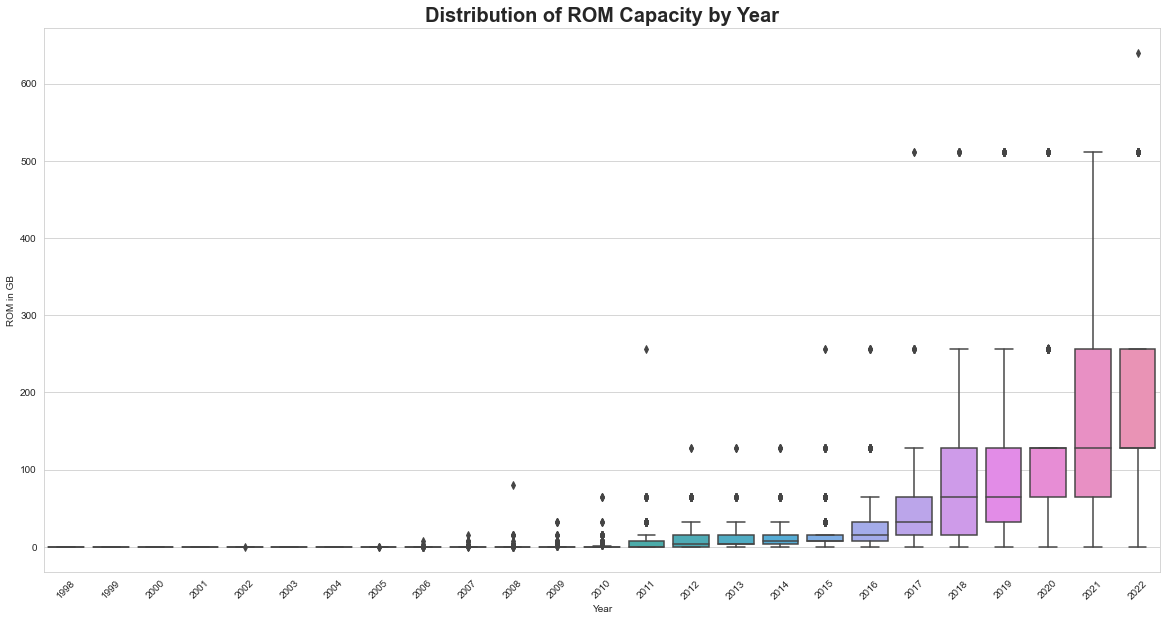

In [47]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[(df['ROM'] != 'unspecified') & 
                  (df['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['ROM'] = pd.to_numeric(filtered_df['ROM'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='ROM')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('ROM in GB')
plt.title('Distribution of ROM Capacity by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

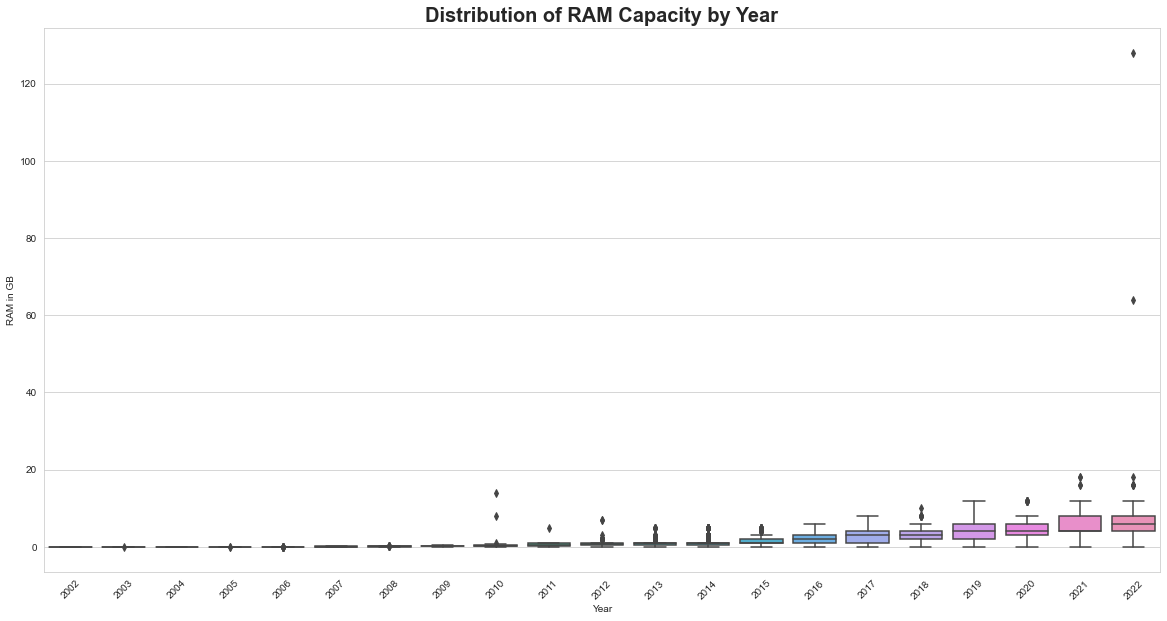

In [48]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[(df['RAM'] != 'unspecified') & 
                  (df['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['RAM'] = pd.to_numeric(filtered_df['RAM'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='RAM')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('RAM in GB')
plt.title('Distribution of RAM Capacity by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

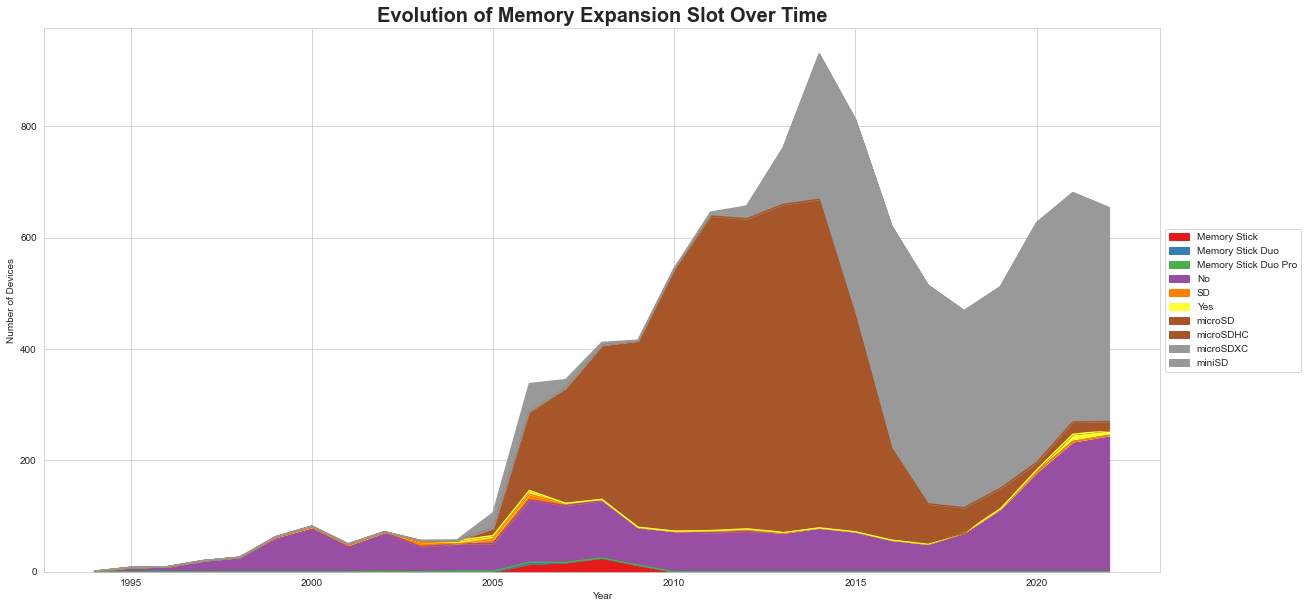

In [49]:
# Group the data by year and display type and calculate the count
chipset_data = df[df['Release_Year'] <= 2022]
chipset_counts = chipset_data.groupby(['Release_Year', 'SD Card Slot'])['SD Card Slot'].count().unstack()

# Exclude the "Not Specified" display type
#chipset_counts = chipset_counts.drop('unspecified', axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Create the stacked area plot
chipset_counts.plot(kind='area', stacked=True, cmap='Set1', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Devices')

# Set the title
ax.set_title('Evolution of Memory Expansion Slot Over Time', fontsize=20, weight='bold')

# Move the legend outside the plot to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

***** Battery *****

In [50]:
df['Removable'].value_counts()

Yes            5501
No             4555
unspecified     441
Name: Removable, dtype: int64

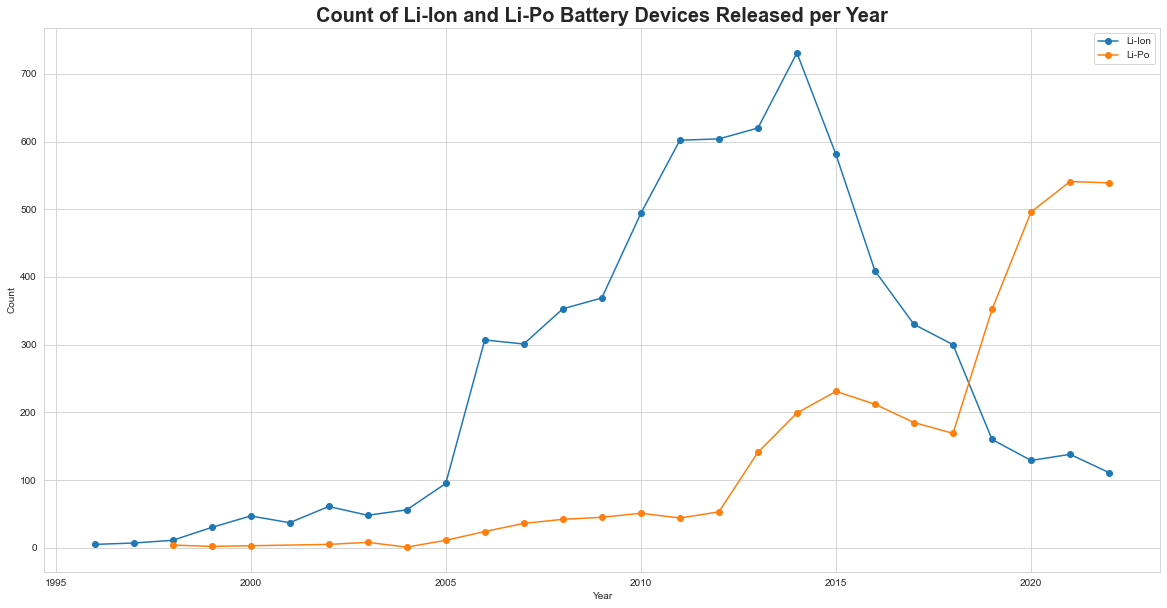

In [51]:
# Exclude the year 2023
filtered_df = df[df['Release_Year'] != 2023]

# Filter the dataframe for Li-Ion and Li-Po battery types
yes_counts = filtered_df[filtered_df['Battery_Type'] == 'Li-Ion']['Release_Year'].value_counts().sort_index()
no_counts = filtered_df[filtered_df['Battery_Type'] == 'Li-Po']['Release_Year'].value_counts().sort_index()

# Plot the count of Li-Ion battery devices released in each year
plt.figure(figsize=(20, 10))
yes_counts.plot(marker='o', label='Li-Ion')

# Plot the count of Li-Po battery devices released in each year
no_counts.plot(marker='o', label='Li-Po')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Li-Ion and Li-Po Battery Devices Released per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()


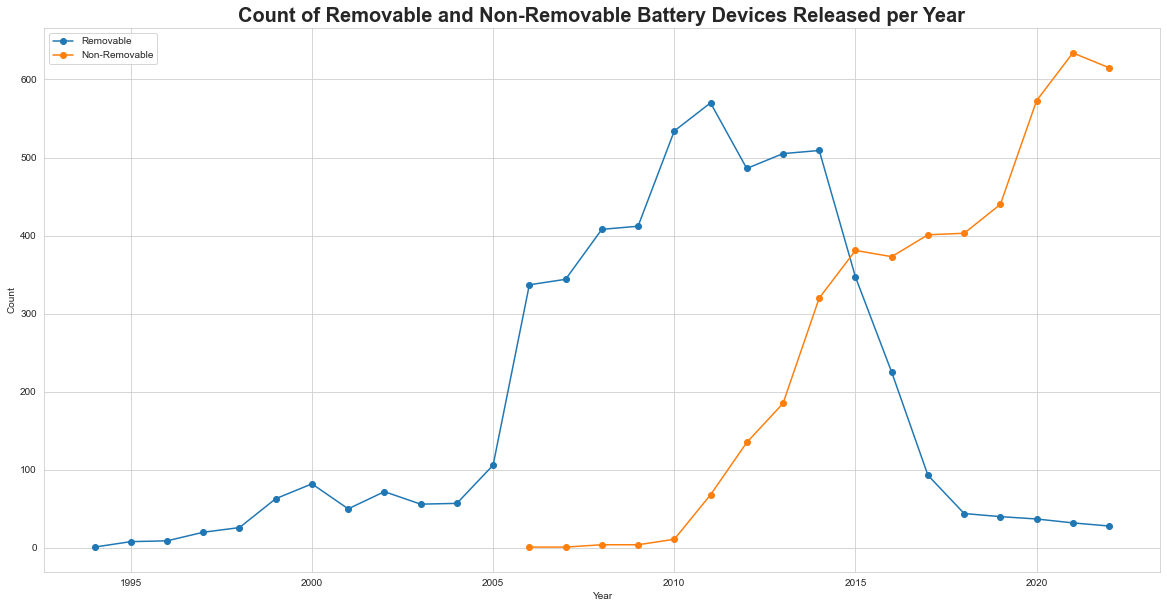

In [52]:
# Exclude the year 2023
filtered_df = df[df['Release_Year'] != 2023]

# Filter the dataframe for Li-Ion and Li-Po battery types
yes_counts = filtered_df[filtered_df['Removable'] == 'Yes']['Release_Year'].value_counts().sort_index()
no_counts = filtered_df[filtered_df['Removable'] == 'No']['Release_Year'].value_counts().sort_index()

# Plot the count of Li-Ion battery devices released in each year
plt.figure(figsize=(20, 10))
yes_counts.plot(marker='o', label='Removable')

# Plot the count of Li-Po battery devices released in each year
no_counts.plot(marker='o', label='Non-Removable')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Removable and Non-Removable Battery Devices Released per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [53]:
df['Battery_Capacity'].value_counts()

5000           741
unspecified    576
4000           541
3000           479
2000           444
              ... 
3330             1
21               1
43               1
451              1
4420             1
Name: Battery_Capacity, Length: 571, dtype: int64

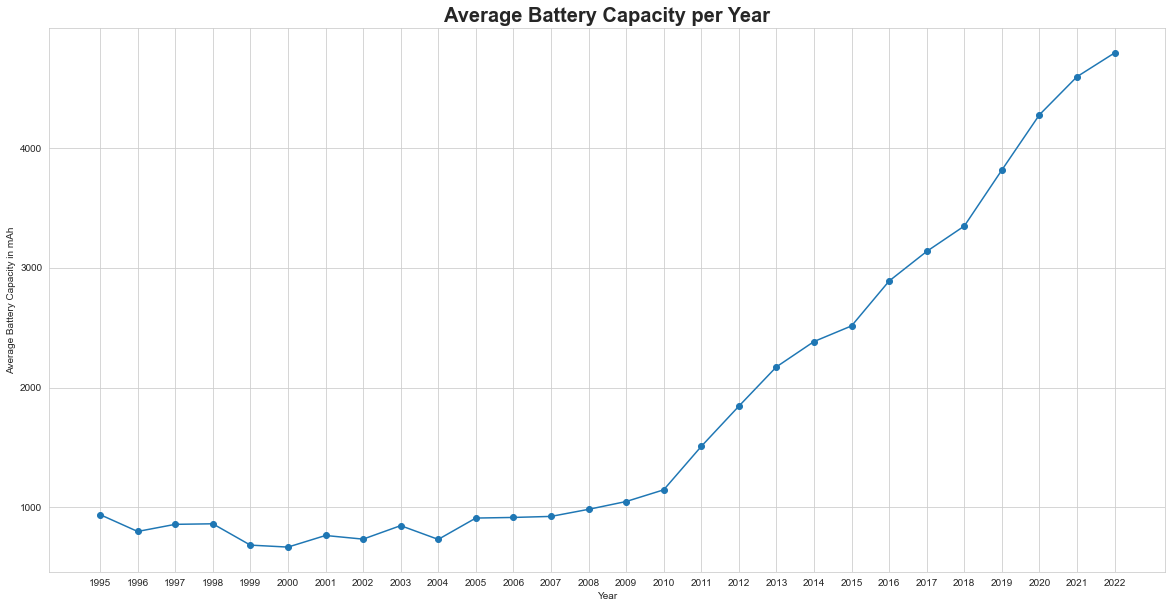

In [54]:
# Filter the DataFrame to exclude 0 values and data for the year 2023
filtered_df5 = df[(df['Battery_Capacity'] != 'unspecified') & (df['Release_Year'] <= 2022)]

# Calculate the average Fabrication Process per year
avg_battery_capacity = filtered_df5.groupby('Release_Year')['Battery_Capacity'].mean()

# Create the line plot
plt.figure(figsize=(20, 10))
plt.plot(avg_battery_capacity.index, avg_battery_capacity.values, marker='o')

# Set the x-axis ticks and labels
plt.xticks(avg_battery_capacity.index)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Battery Capacity in mAh')
plt.title('Average Battery Capacity per Year', fontsize=20, weight='bold')

# Show the plot
plt.show()

In [55]:
df['Reverse_Charging'].value_counts()

unspecified    10122
Yes              375
Name: Reverse_Charging, dtype: int64

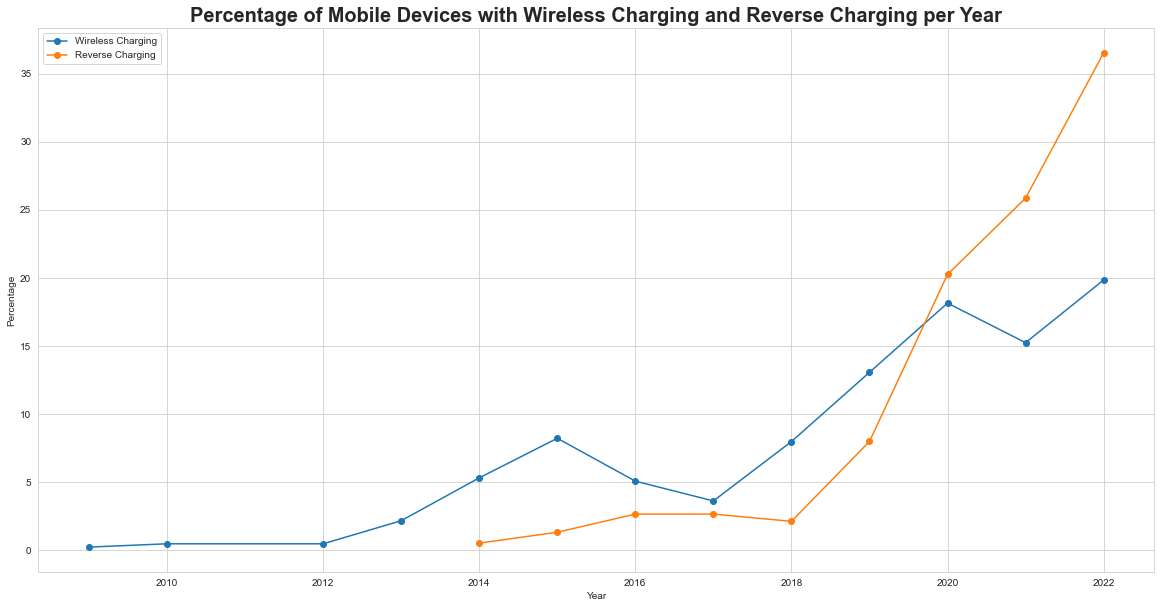

In [56]:
import matplotlib.pyplot as plt

# Replace "unspecified" values with "No" in both columns
df['Wireless_Charging'] = df['Wireless_Charging'].replace('unspecified', 'No')
df['Reverse_Charging'] = df['Reverse_Charging'].replace('unspecified', 'No')

# Exclude the year 2023
filtered_df = df[df['Release_Year'] != 2023]

# Calculate the percentage of mobile devices with wireless charging in each year
wireless_charging_percentages = (filtered_df[filtered_df['Wireless_Charging'] == 'Yes']['Release_Year']
                                 .value_counts(normalize=True).sort_index() * 100)

# Calculate the percentage of mobile devices with reverse charging in each year
reverse_charging_percentages = (filtered_df[filtered_df['Reverse_Charging'] == 'Yes']['Release_Year']
                                .value_counts(normalize=True).sort_index() * 100)

# Plot the line graph for wireless charging percentages
plt.figure(figsize=(20, 10))
wireless_charging_percentages.plot(marker='o', label='Wireless Charging')

# Plot the line graph for reverse charging percentages
reverse_charging_percentages.plot(marker='o', label='Reverse Charging')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Mobile Devices with Wireless Charging and Reverse Charging per Year', fontsize=20, weight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [57]:
'Charging_Speed','Battery_Life'

('Charging_Speed', 'Battery_Life')

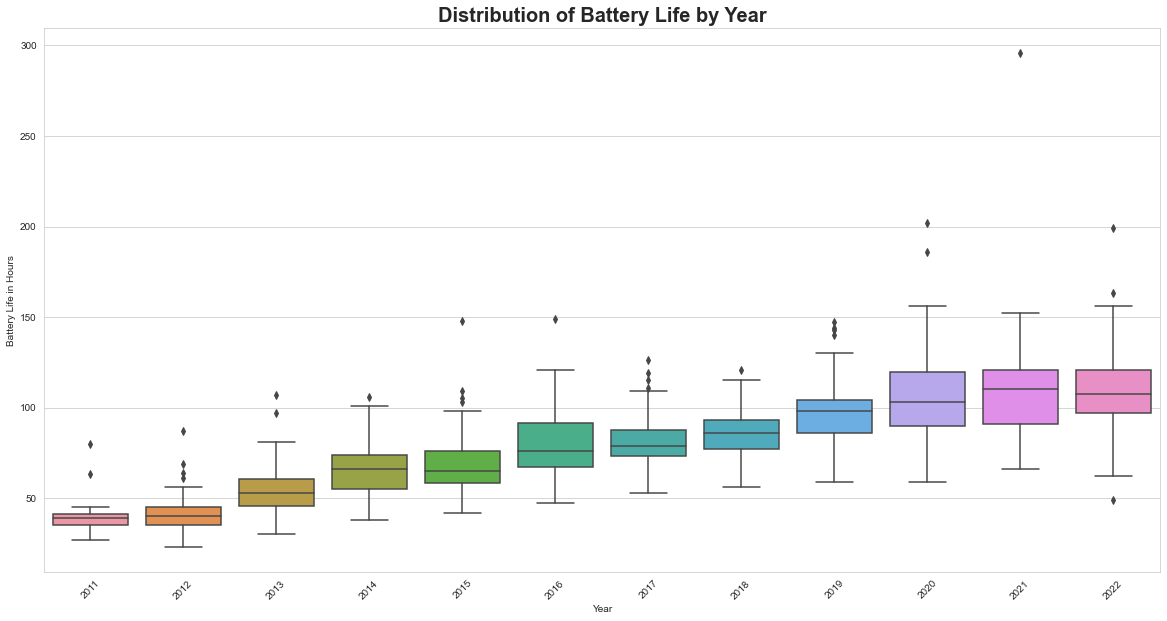

In [58]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[(df['Battery_Life'] != 'untested') & 
                  (df['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['Battery_Life'] = pd.to_numeric(filtered_df['Battery_Life'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='Battery_Life')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Battery Life in Hours')
plt.title('Distribution of Battery Life by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

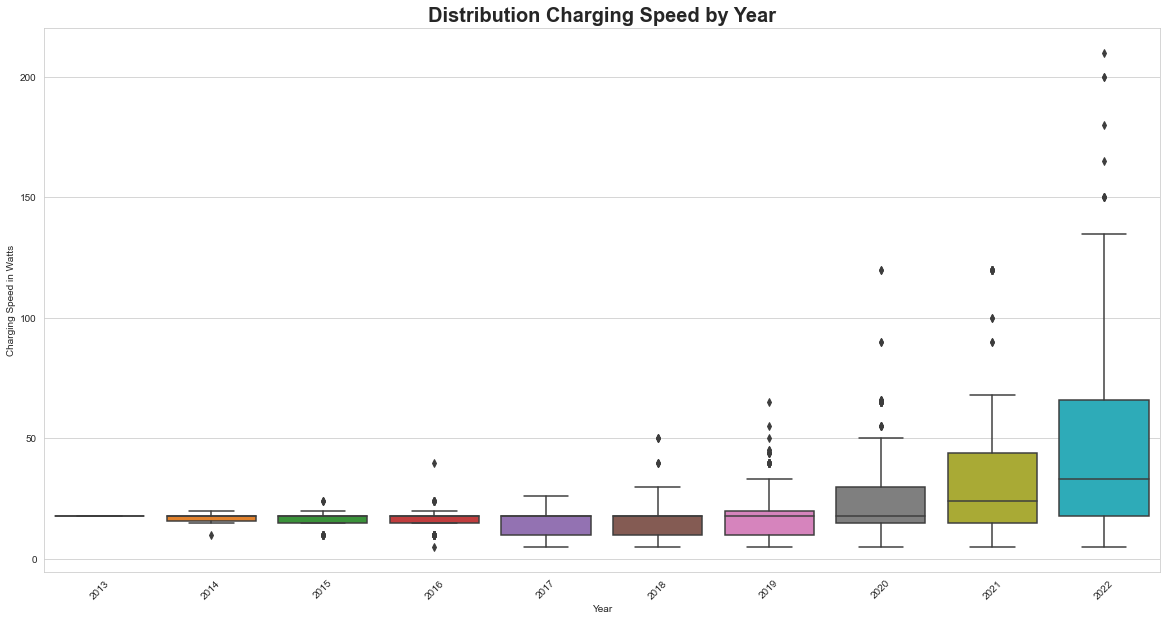

In [59]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[(df['Charging_Speed'] != 'unspecified') & 
                  (df['Release_Year'] <= 2022)]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['Charging_Speed'] = pd.to_numeric(filtered_df['Charging_Speed'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='Charging_Speed')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Charging Speed in Watts')
plt.title('Distribution Charging Speed by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

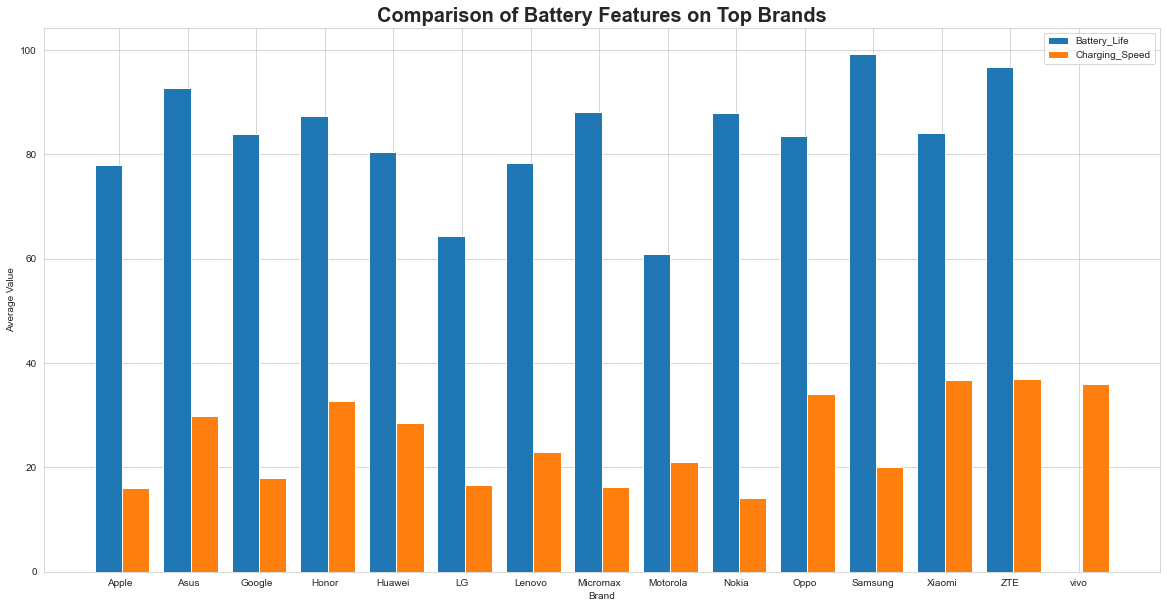

In [60]:
# Define the columns to compare
columns_to_compare = ['Battery_Life', 'Charging_Speed']

# Filter out non-numeric and "Not Specified" or "Not Measured" values
numeric_data = top_brand_data.replace(['unspecified', 'untested'], float('NaN'))
numeric_data[columns_to_compare] = numeric_data[columns_to_compare].apply(pd.to_numeric, errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Get the number of columns to compare
num_columns = len(columns_to_compare)

# Set the width of each bar
bar_width = 0.8 / num_columns

# Filter brands that have non-null values for Display_Brightness
#valid_brands = numeric_data.dropna(subset=['Display_Brightness'])['Brand'].unique()

# Loop through the columns and plot the bar chart for each
for i, column in enumerate(columns_to_compare):
    # Get the average values for each brand, excluding NaN values
    avg_values = numeric_data[numeric_data['Brand'].isin(valid_brands)].groupby('Brand')[column].mean().dropna()
    
    # Calculate the x positions for the bars
    x_pos = np.arange(len(avg_values)) + (i * bar_width) - (0.4 * bar_width)
    
    # Plot the bars
    plt.bar(x_pos, avg_values, width=bar_width, label=column)
    
# Set the x-axis ticks and labels
plt.xticks(np.arange(len(avg_values)), avg_values.index)
plt.xlabel('Brand')
plt.ylabel('Average Value')
plt.title('Comparison of Battery Features on Top Brands', fontsize=20, weight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()


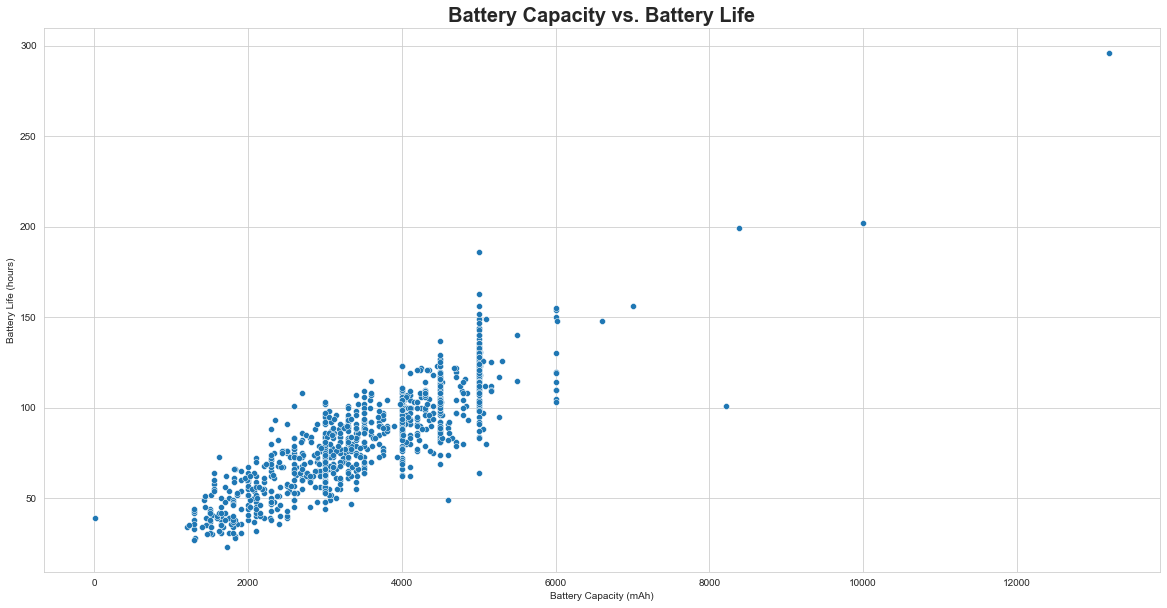

In [61]:
# Exclude "unspecified" and "untested" values from the columns
filtered_df = df[(df['Battery_Life'] != 'unspecified') &
                  (df['Battery_Life'] != 'untested') &
                  (df['Battery_Capacity'] != 'unspecified') &
                  (df['Battery_Capacity'] != 'untested')]

# Convert columns to numeric data types
filtered_df['Battery_Life'] = pd.to_numeric(filtered_df['Battery_Life'])
filtered_df['Battery_Capacity'] = pd.to_numeric(filtered_df['Battery_Capacity'])

# Create scatterplot using Seaborn
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_df, x='Battery_Capacity', y='Battery_Life')

# Set plot title and axis labels
plt.title('Battery Capacity vs. Battery Life', fontsize=20, weight='bold')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Battery Life (hours)')

# Display the scatterplot
plt.show()


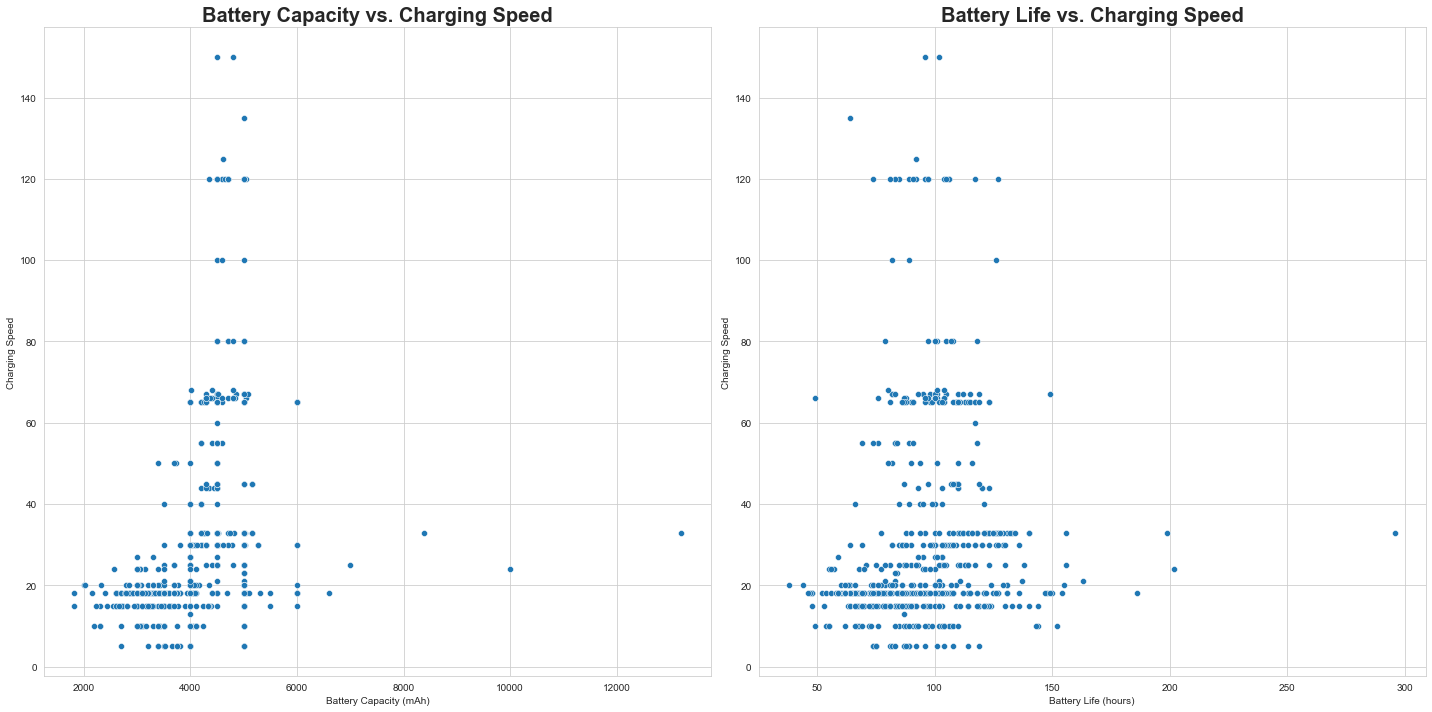

In [62]:
# Exclude "unspecified" and "untested" values from the columns
filtered_df = df[(df['Battery_Life'] != 'unspecified') &
                  (df['Battery_Life'] != 'untested') &
                  (df['Charging_Speed'] != 'unspecified') &
                  (df['Charging_Speed'] != 'untested')]

# Convert columns to numeric data types
filtered_df['Battery_Life'] = pd.to_numeric(filtered_df['Battery_Life'])
filtered_df['Battery_Capacity'] = pd.to_numeric(filtered_df['Battery_Capacity'])
filtered_df['Charging_Speed'] = pd.to_numeric(filtered_df['Charging_Speed'])

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create scatterplot for Battery_Capacity and Charging_Speed
plt.subplot(1, 2, 1)
sns.scatterplot(data=filtered_df, x='Battery_Capacity', y='Charging_Speed')
plt.title('Battery Capacity vs. Charging Speed', fontsize=20, weight='bold')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Charging Speed')

# Create scatterplot for Battery_Life and Charging_Speed
plt.subplot(1, 2, 2)
sns.scatterplot(data=filtered_df, x='Battery_Life', y='Charging_Speed')
plt.title('Battery Life vs. Charging Speed', fontsize=20, weight='bold')
plt.xlabel('Battery Life (hours)')
plt.ylabel('Charging Speed')

# Adjust spacing between subplots
plt.tight_layout()

# Display the scatterplots
plt.show()


***** Special Features *****

In [63]:
cleaned_gsm_arena_data.columns

Index(['Brand', 'Model', 'Highest_Network_Technology', 'Announced', 'Released',
       'Status', 'Length', 'Width', 'Thickness', 'Weight', 'Front', 'Back',
       'Frame', 'Number_of_SIMs', 'Type_of_SIM', 'Display_Type',
       'Display_Brightness', 'Display_HDR_Capability', 'Display_Size_(inches)',
       'Screen_To_Body_Ratio_(%)', 'Display_Aspect_Ratio', 'Pixel_Density',
       'Display_Protection', 'Mobile_OS', 'Mobile_OS_Version', 'Chipset_Maker',
       'Fabrication_Process', 'Number_of_CPU_Cores',
       'CPU_Performance_Core_Frequency', 'CPU_Efficiency_Core_Frequency',
       'SD Card Slot', 'ROM', 'RAM', 'Number_of_Rear_Cameras',
       'Storage_Type_Version', 'Storage_Type', 'Highest_Camera_Resolution',
       'HDR', 'Rear_Video_Resolution', 'Rear_Video_Framerate',
       'Number_of_Selfie_Cameras', 'Selfie_Video_Resolution',
       'Selfie_Video_Framerate', 'Headphone_Jack', 'WI-FI', 'Bluetooth', 'NFC',
       'Radio', 'USB_Connector', 'USB_Version', 'Biometric_Sensor',
    

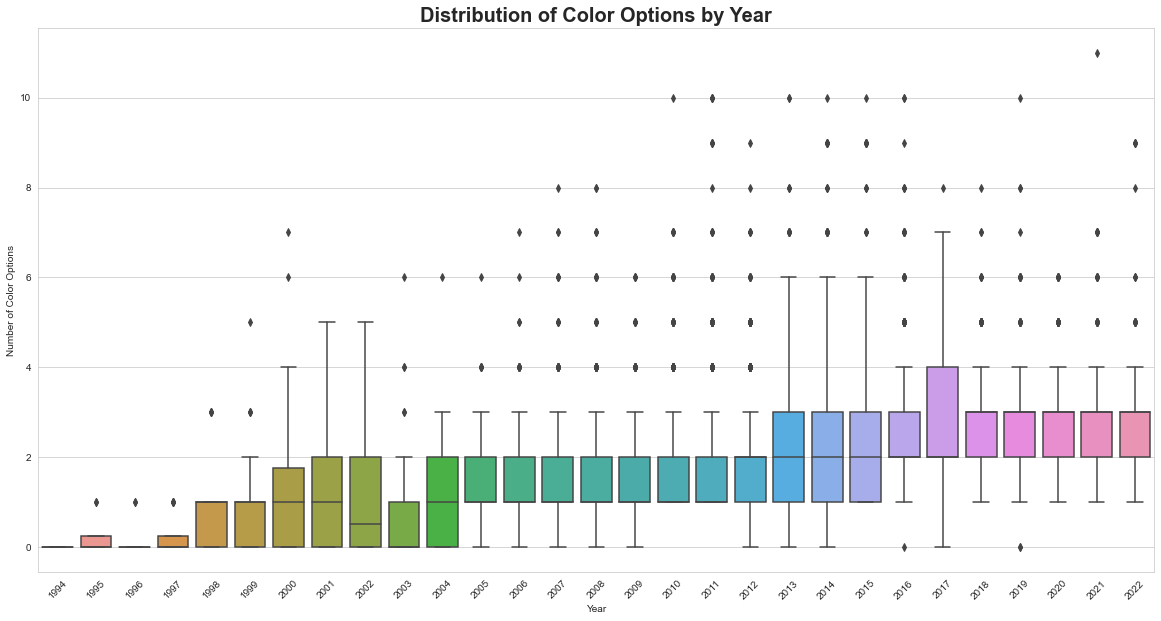

In [64]:
# Exclude "unspecified" values, data for the year 2023, and values above 10
filtered_df = df[df['Release_Year'] <= 2022]
#& 
 #                 (pd.to_numeric(df['CPU_Performance_Core_Frequency'], errors='coerce') <= 10)]

# Convert the CPU_Performance_Core_Frequency column to numeric
filtered_df['Colors'] = pd.to_numeric(filtered_df['Colors'], errors='coerce')

# Create boxplots for each year
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df, x='Release_Year', y='Colors')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Number of Color Options')
plt.title('Distribution of Color Options by Year', fontsize=20, weight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

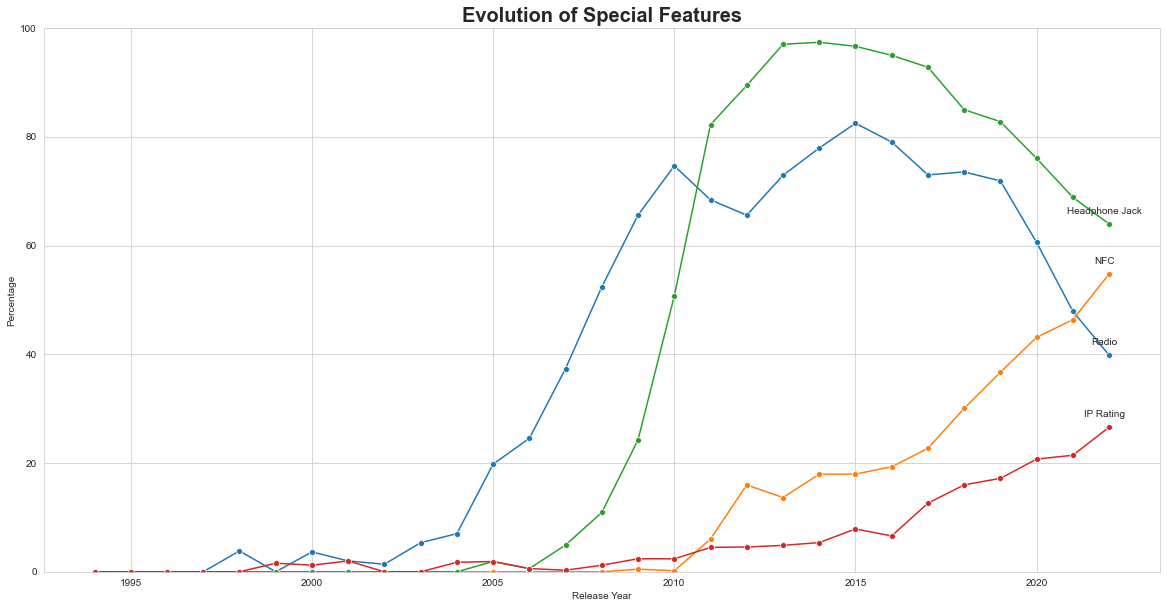

In [65]:
# Exclude the "unspecified" values and year 2023 for Radio
radio_filtered = df[(df['Radio'] != 'unspecified') & (df['Release_Year'] != 2023)]
radio_filtered['Radio'] = radio_filtered['Radio'].replace('Yes (Market/Model/Software Dependent)', 'Yes')
radio_percentage = radio_filtered.groupby('Release_Year')['Radio'].apply(lambda x: (x == 'Yes').mean() * 100)

# Exclude the "unspecified" values and year 2023 for NFC
nfc_filtered = df[(df['NFC'] != 'unspecified') & (df['Release_Year'] != 2023)]
nfc_filtered['NFC'] = nfc_filtered['NFC'].replace('Yes (Market/Model/Use Case Dependent)', 'Yes')
nfc_percentage = nfc_filtered.groupby('Release_Year')['NFC'].apply(lambda x: (x == 'Yes').mean() * 100)

# Exclude the "unspecified" values and year 2023 for Headphone Jack
headphone_jack_filtered = df[(df['Headphone_Jack'] != 'unspecified') & (df['Release_Year'] != 2023)]
headphone_jack_percentage = headphone_jack_filtered.groupby('Release_Year')['Headphone_Jack'].apply(lambda x: (x == 'Yes').mean() * 100)

# Change "No Resistance" values to "No" and all other values to "Yes" for IP Rating
ip_rating_unique = df['IP_Rating'].unique()
replace_dict = {'No Resistance': 'No'}
for rating in ip_rating_unique[1:]:
    replace_dict[rating] = 'Yes'
df['IP_Rating'] = df['IP_Rating'].replace(replace_dict)

# Filter the data up to 2022 for IP Rating
ip_rating_filtered = df[df['Release_Year'] <= 2022]
ip_rating_percentage = ip_rating_filtered.groupby('Release_Year')['IP_Rating'].apply(lambda x: (x == 'Yes').mean() * 100)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the four line graphs with markers
sns.lineplot(data=radio_percentage, ax=ax, marker='o', label='Radio')
sns.lineplot(data=nfc_percentage, ax=ax, marker='o', label='NFC')
sns.lineplot(data=headphone_jack_percentage, ax=ax, marker='o', label='Headphone Jack')
sns.lineplot(data=ip_rating_percentage, ax=ax, marker='o', label='IP Rating')

# Annotate the lines with their respective titles
for line in ax.lines:
    x = line.get_xdata()[-1]
    y = line.get_ydata()[-1]
    label = line.get_label()
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(-5, 10), ha='center')

# Set the title, x-axis label, y-axis label, and y-axis limits
ax.set_title('Evolution of Special Features', fontsize=20, weight='bold')
ax.set_xlabel('Release Year')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)

# Remove the legend
ax.legend_.remove()

# Show the plot
plt.show()


***** Price *****

In [66]:
df['Price'].value_counts()

unspecified    2835
100.0           365
150.0           338
120.0           326
70.0            318
               ... 
264.0             1
87.0              1
257.0             1
318.0             1
1050.0            1
Name: Price, Length: 459, dtype: int64

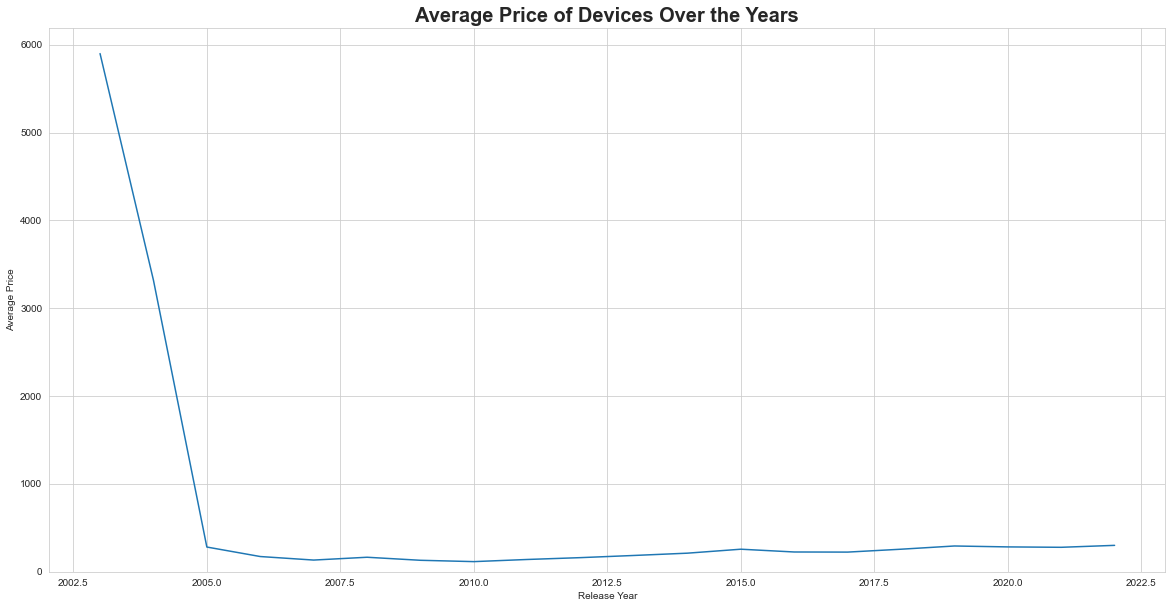

In [67]:
# Filter out unspecified and non-numeric values in the Price column
filtered_data = df[(df['Price'] != 'unspecified') & (df['Release_Year'] != 2023)]
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'])

# Group the filtered data by Release_Year and calculate the average price
average_price = filtered_data.groupby('Release_Year')['Price'].mean()

# Create a line plot for the average price over the years
plt.figure(figsize=(20, 10))
plt.plot(average_price.index, average_price.values)
plt.title('Average Price of Devices Over the Years', fontsize=20, weight='bold')
plt.xlabel('Release Year')
plt.ylabel('Average Price')
plt.ylim(0)  # Set the y-axis lower limit to 0

# Show the plot
plt.show()


In [68]:
# Filter out unspecified and non-numeric values in the Price column
filtered_data = df[df['Price'] != 'unspecified']
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'])

# Sort the data by Price in descending order and select the top 10 rows
top_10_expensive = filtered_data.nlargest(20, 'Price')

# Select the desired columns
result = top_10_expensive[['Price', 'Brand', 'Model', 'Release_Year']]

# Display the result as a table
print(result)


         Price   Brand                         Model  Release_Year
11128  13000.0   Apple  Watch Edition 42mm (1st gen)          2015
11127  11000.0   Apple  Watch Edition 38mm (1st gen)          2015
1586    9000.0   Vertu        Signature Touch (2015)          2015
1584    8290.0   Vertu               Signature Touch          2014
1582    7900.0   Vertu                            Ti          2013
1579    6140.0   Vertu           Constellation Quest          2010
1570    5900.0   Vertu                     Signature          2003
1574    5530.0   Vertu                     Ascent Ti          2008
1585    5440.0   Vertu                         Aster          2014
1572    5160.0   Vertu                       Diamond          2005
1575    5160.0   Vertu                   Signature S          2008
1577    5020.0   Vertu           Constellation Ayxta          2009
1583    5000.0   Vertu            Constellation 2013          2013
8897    4180.0  Huawei                 nova 8 Pro 5G          

In [69]:
# Filter out unspecified and non-numeric values in the Price column
filtered_data = df[df['Price'] != 'unspecified']
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'])

# Sort the data by Price in ascending order and select the top 10 rows
top_10_cheapest = filtered_data.nsmallest(100, 'Price')

# Select the desired columns
result = top_10_cheapest[['Price', 'Brand', 'Model', 'Release_Year']]

# Display the result as a table
print(result)


      Price     Brand              Model  Release_Year
1421    1.0      vivo           X90 Pro+          2022
2424    1.0      Sony         Xperia Pro          2021
2429    1.0      Sony       Xperia Pro-I          2021
3954    1.0   Samsung  Galaxy Z Fold3 5G          2021
3993    1.0   Samsung     Galaxy Z Fold4          2022
...     ...       ...                ...           ...
6756   20.0  Micromax               X118          2010
6766   20.0  Micromax              X226+          2010
6787   20.0  Micromax               X11i          2011
6788   20.0  Micromax               X271          2012
6797   20.0  Micromax               X102          2012

[100 rows x 4 columns]


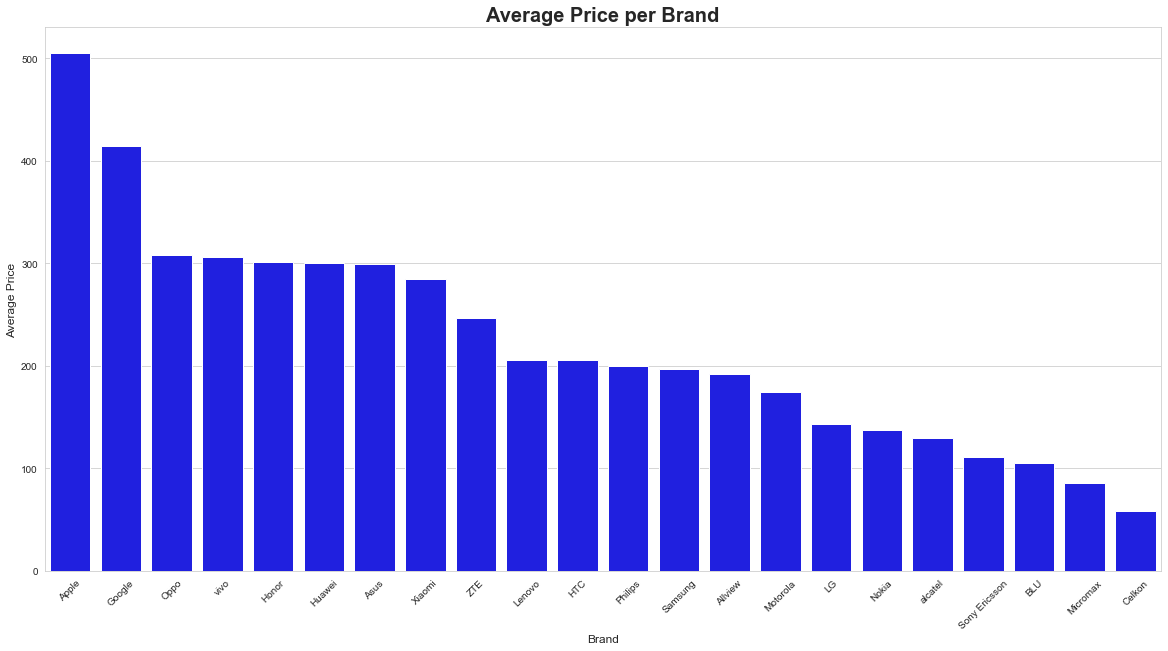

In [70]:
# Filter out the "unspecified" values from the "Price" column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']

# Convert the "Price" column to numeric
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'], errors='coerce')

# Filter out prices above 6000
filtered_data = filtered_data[filtered_data['Price'] <= 6000]

# Calculate the average price per brand
average_price = filtered_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot of average price per brand
sns.barplot(x=average_price.index, y=average_price.values, color='blue')

# Set the title and labels
plt.title('Average Price per Brand', fontsize=20, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


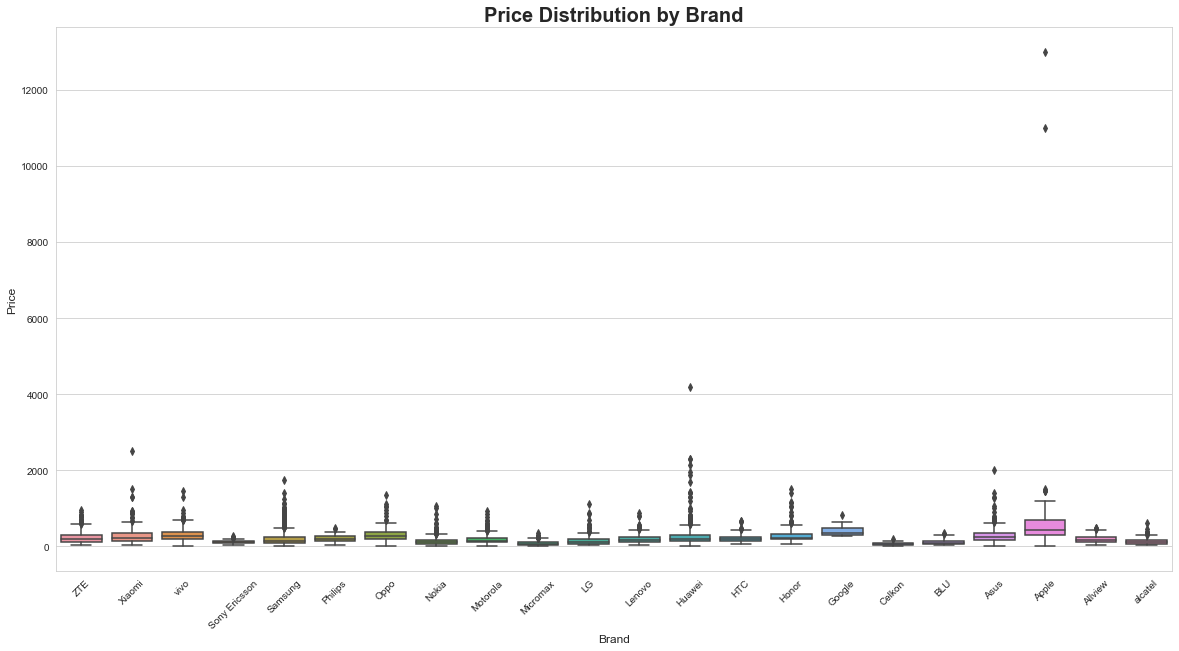

In [71]:
# Filter out the "unspecified" values from the "Price" column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']

# Convert the "Price" column to numeric
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'], errors='coerce')

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a boxplot of Price distribution for each brand
sns.boxplot(x='Brand', y='Price', data=filtered_data)

# Set the title and labels
plt.title('Price Distribution by Brand', fontsize=20, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


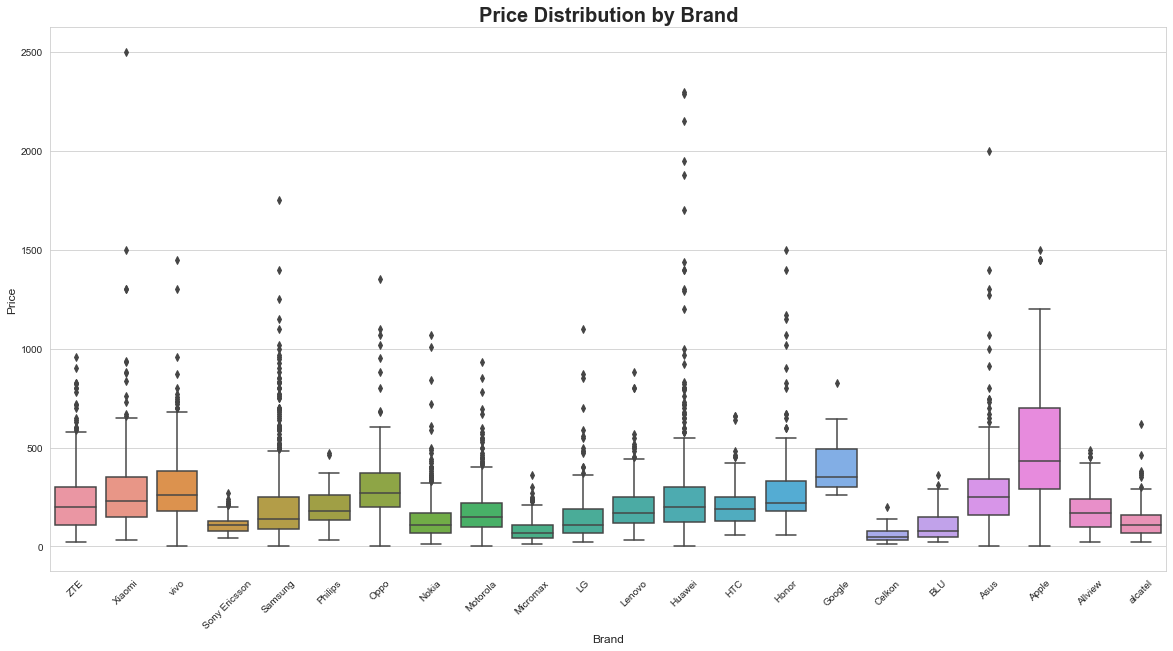

In [72]:
# Filter out the "unspecified" values from the "Price" column
filtered_data = top_brand_data[top_brand_data['Price'] != 'unspecified']

# Convert the "Price" column to numeric
filtered_data['Price'] = pd.to_numeric(filtered_data['Price'], errors='coerce')

# Filter out prices above 6000
filtered_data = filtered_data[filtered_data['Price'] <= 3000]

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a boxplot of Price distribution for each brand
sns.boxplot(x='Brand', y='Price', data=filtered_data)

# Set the title and labels
plt.title('Price Distribution by Brand', fontsize=20, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [73]:
cleaned_gsm_arena_data.columns

Index(['Brand', 'Model', 'Highest_Network_Technology', 'Announced', 'Released',
       'Status', 'Length', 'Width', 'Thickness', 'Weight', 'Front', 'Back',
       'Frame', 'Number_of_SIMs', 'Type_of_SIM', 'Display_Type',
       'Display_Brightness', 'Display_HDR_Capability', 'Display_Size_(inches)',
       'Screen_To_Body_Ratio_(%)', 'Display_Aspect_Ratio', 'Pixel_Density',
       'Display_Protection', 'Mobile_OS', 'Mobile_OS_Version', 'Chipset_Maker',
       'Fabrication_Process', 'Number_of_CPU_Cores',
       'CPU_Performance_Core_Frequency', 'CPU_Efficiency_Core_Frequency',
       'SD Card Slot', 'ROM', 'RAM', 'Number_of_Rear_Cameras',
       'Storage_Type_Version', 'Storage_Type', 'Highest_Camera_Resolution',
       'HDR', 'Rear_Video_Resolution', 'Rear_Video_Framerate',
       'Number_of_Selfie_Cameras', 'Selfie_Video_Resolution',
       'Selfie_Video_Framerate', 'Headphone_Jack', 'WI-FI', 'Bluetooth', 'NFC',
       'Radio', 'USB_Connector', 'USB_Version', 'Biometric_Sensor',
    

In [74]:
# Replace "unspecified" values with NaN
df['Price'] = df['Price'].replace('unspecified', np.nan)

# Convert the 'Price' column to numeric data type
df['Price'] = pd.to_numeric(df['Price'])




# Select the relevant numerical columns and drop rows with missing values
numeric_columns = ['Length', 'Width', 'Thickness', 'Weight', 'Display_Brightness', 'Display_Size_(inches)', 'Screen_To_Body_Ratio_(%)', 'Pixel_Density', 'CPU_Performance_Core_Frequency', 'CPU_Efficiency_Core_Frequency', 'ROM', 'RAM', 'Rear_Video_Resolution', 'Rear_Video_Framerate', 'Number_of_Selfie_Cameras', 'Selfie_Video_Resolution', 'Selfie_Video_Framerate', 'Battery_Capacity', 'Price']
numeric_df = df[numeric_columns].dropna()

# Calculate the correlation coefficients
correlation_coeffs = df[numeric_columns].corr()['Price'].abs().sort_values(ascending=False)

# Display the top influential columns
top_influential_columns = correlation_coeffs[1:6]  # Exclude 'Price' column
print(top_influential_columns)


Number_of_Selfie_Cameras    0.152372
Name: Price, dtype: float64


In [75]:
df['Price'].value_counts()

100.0     365
150.0     338
120.0     326
70.0      318
80.0      315
         ... 
264.0       1
87.0        1
257.0       1
318.0       1
1050.0      1
Name: Price, Length: 458, dtype: int64

In [76]:
# Replace specified values with NaN
specified_values = ['Unspecified', 'unspecified', 'untested', 'not measured']
df = df.replace(specified_values, np.nan)

# Convert numeric columns to numeric data type
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Calculate the correlation coefficients
correlation_coeffs = df[numeric_columns].corr()['Price'].abs().sort_values(ascending=False)

# Display the top influential columns
print(correlation_coeffs.head(29))


Price                             1.000000
ROM                               0.315133
Charging_Speed                    0.288317
RAM                               0.245080
Loudspeaker_Noise                 0.232842
Highest_Camera_Resolution         0.210666
Loudspeaker_Ring                  0.189066
Battery_Capacity                  0.179638
Battery_Life                      0.174318
Number_of_CPU_Cores               0.159264
Number_of_Selfie_Cameras          0.152372
Number_of_Rear_Cameras            0.149496
Release_Year                      0.143035
Colors                            0.114091
CPU_Performance_Core_Frequency    0.079702
CPU_Efficiency_Core_Frequency     0.026855
Fabrication_Process               0.022916
Loudspeaker_Voice                 0.013850
Number_of_SIMs                    0.008346
Name: Price, dtype: float64


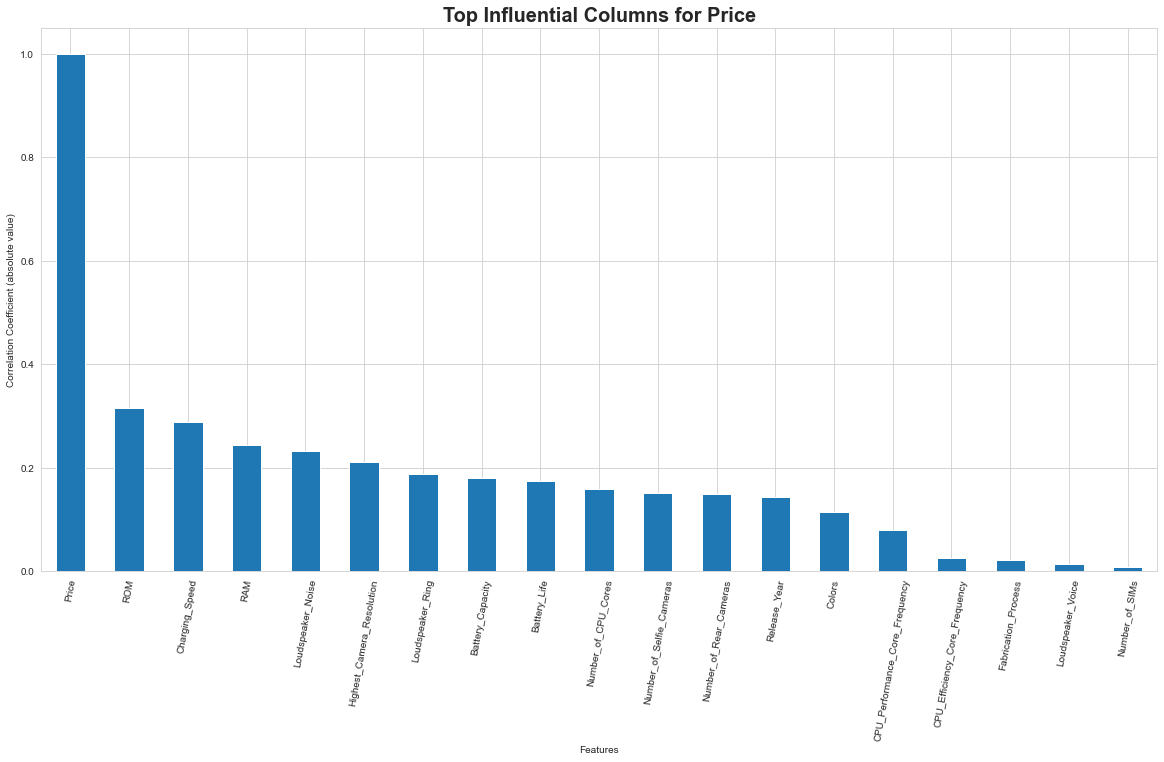

In [83]:
# Replace specified values with NaN
specified_values = ['Unspecified', 'unspecified', 'untested', 'not measured', 'Not measured']
df = df.replace(specified_values, np.nan)

# Convert numeric columns to numeric data type
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Calculate the correlation coefficients
correlation_coeffs = df[numeric_columns].corr()['Price'].abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(20, 10))
correlation_coeffs.head(30).plot(kind='bar')
plt.title('Top Influential Columns for Price', fontsize=20, weight='bold')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.xticks(rotation=80)
plt.show()


In [78]:
df['Mobile_OS'].value_counts()

Android                         6752
Microsoft Windows Mobile         263
Symbian                          127
Microsoft Windows Phone          114
iOS                               90
Proprietary OS                    74
Blackberry OS                     60
HarmonyOS                         38
watchOS                           33
Linux                             28
Tizen OS                          24
Microsoft Windows                 23
iPad OS                           13
Bada OS                           11
Firefox OS                        11
Palm OS                            8
WebOS                              8
Nokia Asha Software Platform       7
Microsoft Windows PocketPC         4
EMUI                               4
Blackberry Tablet OS               4
Danger                             3
MeeGo                              3
Sailfish OS                        3
LiMo OS                            2
Huawei Lite OS                     2
Microsoft Smartphone               1
F